In [1]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import cv2
import split_folders
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
base_path = './dataset/'
batch_size = 32
img_size = 48
epochs = 30
emotion = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [11]:
#### This method it used to convert the pixels into the images 
###### This is a one time process hence commented this code
def convert_pixel_to_image():
    dt = pd.read_csv("fer2013.csv")
    pix= dt.head(1)["pixels"]
    for index, row in dt.iterrows():
        pixels = np.asarray(list(row['pixels'].split(' ')), dtype=np.uint8)
        img=pixels.reshape((48,48))
        path = base_path + emotion[row['emotion']]
        pathname = os.path.join(path, str(index)+'.jpg')
        cv2.imwrite(pathname,img)
        print('image saved as {}'.format(pathname))

In [12]:
#### This method it used to convert the pixels into the images 
convert_pixel_to_image()


image saved as ./dataset/Angry\0.jpg
image saved as ./dataset/Angry\1.jpg
image saved as ./dataset/Fear\2.jpg
image saved as ./dataset/Sad\3.jpg
image saved as ./dataset/Neutral\4.jpg
image saved as ./dataset/Fear\5.jpg
image saved as ./dataset/Sad\6.jpg
image saved as ./dataset/Happy\7.jpg
image saved as ./dataset/Happy\8.jpg
image saved as ./dataset/Fear\9.jpg
image saved as ./dataset/Angry\10.jpg
image saved as ./dataset/Neutral\11.jpg
image saved as ./dataset/Neutral\12.jpg
image saved as ./dataset/Neutral\13.jpg
image saved as ./dataset/Happy\14.jpg
image saved as ./dataset/Surprise\15.jpg
image saved as ./dataset/Happy\16.jpg
image saved as ./dataset/Fear\17.jpg
image saved as ./dataset/Neutral\18.jpg
image saved as ./dataset/Sad\19.jpg
image saved as ./dataset/Sad\20.jpg
image saved as ./dataset/Fear\21.jpg
image saved as ./dataset/Angry\22.jpg
image saved as ./dataset/Angry\23.jpg
image saved as ./dataset/Happy\24.jpg
image saved as ./dataset/Happy\25.jpg
image saved as ./datas

image saved as ./dataset/Fear\420.jpg
image saved as ./dataset/Angry\421.jpg
image saved as ./dataset/Sad\422.jpg
image saved as ./dataset/Neutral\423.jpg
image saved as ./dataset/Sad\424.jpg
image saved as ./dataset/Surprise\425.jpg
image saved as ./dataset/Sad\426.jpg
image saved as ./dataset/Sad\427.jpg
image saved as ./dataset/Fear\428.jpg
image saved as ./dataset/Angry\429.jpg
image saved as ./dataset/Sad\430.jpg
image saved as ./dataset/Angry\431.jpg
image saved as ./dataset/Fear\432.jpg
image saved as ./dataset/Angry\433.jpg
image saved as ./dataset/Angry\434.jpg
image saved as ./dataset/Surprise\435.jpg
image saved as ./dataset/Happy\436.jpg
image saved as ./dataset/Happy\437.jpg
image saved as ./dataset/Surprise\438.jpg
image saved as ./dataset/Happy\439.jpg
image saved as ./dataset/Happy\440.jpg
image saved as ./dataset/Sad\441.jpg
image saved as ./dataset/Neutral\442.jpg
image saved as ./dataset/Surprise\443.jpg
image saved as ./dataset/Happy\444.jpg
image saved as ./dataset

image saved as ./dataset/Fear\836.jpg
image saved as ./dataset/Surprise\837.jpg
image saved as ./dataset/Neutral\838.jpg
image saved as ./dataset/Sad\839.jpg
image saved as ./dataset/Happy\840.jpg
image saved as ./dataset/Neutral\841.jpg
image saved as ./dataset/Angry\842.jpg
image saved as ./dataset/Surprise\843.jpg
image saved as ./dataset/Sad\844.jpg
image saved as ./dataset/Disgust\845.jpg
image saved as ./dataset/Fear\846.jpg
image saved as ./dataset/Fear\847.jpg
image saved as ./dataset/Surprise\848.jpg
image saved as ./dataset/Happy\849.jpg
image saved as ./dataset/Angry\850.jpg
image saved as ./dataset/Angry\851.jpg
image saved as ./dataset/Neutral\852.jpg
image saved as ./dataset/Surprise\853.jpg
image saved as ./dataset/Angry\854.jpg
image saved as ./dataset/Neutral\855.jpg
image saved as ./dataset/Happy\856.jpg
image saved as ./dataset/Surprise\857.jpg
image saved as ./dataset/Neutral\858.jpg
image saved as ./dataset/Fear\859.jpg
image saved as ./dataset/Angry\860.jpg
image 

image saved as ./dataset/Happy\1044.jpg
image saved as ./dataset/Neutral\1045.jpg
image saved as ./dataset/Happy\1046.jpg
image saved as ./dataset/Happy\1047.jpg
image saved as ./dataset/Happy\1048.jpg
image saved as ./dataset/Happy\1049.jpg
image saved as ./dataset/Surprise\1050.jpg
image saved as ./dataset/Angry\1051.jpg
image saved as ./dataset/Happy\1052.jpg
image saved as ./dataset/Happy\1053.jpg
image saved as ./dataset/Neutral\1054.jpg
image saved as ./dataset/Sad\1055.jpg
image saved as ./dataset/Happy\1056.jpg
image saved as ./dataset/Happy\1057.jpg
image saved as ./dataset/Happy\1058.jpg
image saved as ./dataset/Surprise\1059.jpg
image saved as ./dataset/Neutral\1060.jpg
image saved as ./dataset/Angry\1061.jpg
image saved as ./dataset/Neutral\1062.jpg
image saved as ./dataset/Fear\1063.jpg
image saved as ./dataset/Fear\1064.jpg
image saved as ./dataset/Happy\1065.jpg
image saved as ./dataset/Angry\1066.jpg
image saved as ./dataset/Sad\1067.jpg
image saved as ./dataset/Neutral

image saved as ./dataset/Angry\1450.jpg
image saved as ./dataset/Surprise\1451.jpg
image saved as ./dataset/Sad\1452.jpg
image saved as ./dataset/Angry\1453.jpg
image saved as ./dataset/Happy\1454.jpg
image saved as ./dataset/Sad\1455.jpg
image saved as ./dataset/Fear\1456.jpg
image saved as ./dataset/Surprise\1457.jpg
image saved as ./dataset/Fear\1458.jpg
image saved as ./dataset/Happy\1459.jpg
image saved as ./dataset/Angry\1460.jpg
image saved as ./dataset/Sad\1461.jpg
image saved as ./dataset/Angry\1462.jpg
image saved as ./dataset/Sad\1463.jpg
image saved as ./dataset/Surprise\1464.jpg
image saved as ./dataset/Fear\1465.jpg
image saved as ./dataset/Fear\1466.jpg
image saved as ./dataset/Surprise\1467.jpg
image saved as ./dataset/Angry\1468.jpg
image saved as ./dataset/Fear\1469.jpg
image saved as ./dataset/Neutral\1470.jpg
image saved as ./dataset/Fear\1471.jpg
image saved as ./dataset/Neutral\1472.jpg
image saved as ./dataset/Sad\1473.jpg
image saved as ./dataset/Fear\1474.jpg
i

image saved as ./dataset/Neutral\1858.jpg
image saved as ./dataset/Surprise\1859.jpg
image saved as ./dataset/Happy\1860.jpg
image saved as ./dataset/Happy\1861.jpg
image saved as ./dataset/Neutral\1862.jpg
image saved as ./dataset/Angry\1863.jpg
image saved as ./dataset/Surprise\1864.jpg
image saved as ./dataset/Sad\1865.jpg
image saved as ./dataset/Happy\1866.jpg
image saved as ./dataset/Neutral\1867.jpg
image saved as ./dataset/Fear\1868.jpg
image saved as ./dataset/Happy\1869.jpg
image saved as ./dataset/Happy\1870.jpg
image saved as ./dataset/Neutral\1871.jpg
image saved as ./dataset/Surprise\1872.jpg
image saved as ./dataset/Fear\1873.jpg
image saved as ./dataset/Neutral\1874.jpg
image saved as ./dataset/Sad\1875.jpg
image saved as ./dataset/Fear\1876.jpg
image saved as ./dataset/Sad\1877.jpg
image saved as ./dataset/Surprise\1878.jpg
image saved as ./dataset/Neutral\1879.jpg
image saved as ./dataset/Angry\1880.jpg
image saved as ./dataset/Happy\1881.jpg
image saved as ./dataset/

image saved as ./dataset/Angry\2265.jpg
image saved as ./dataset/Surprise\2266.jpg
image saved as ./dataset/Happy\2267.jpg
image saved as ./dataset/Angry\2268.jpg
image saved as ./dataset/Fear\2269.jpg
image saved as ./dataset/Fear\2270.jpg
image saved as ./dataset/Neutral\2271.jpg
image saved as ./dataset/Happy\2272.jpg
image saved as ./dataset/Neutral\2273.jpg
image saved as ./dataset/Neutral\2274.jpg
image saved as ./dataset/Disgust\2275.jpg
image saved as ./dataset/Neutral\2276.jpg
image saved as ./dataset/Surprise\2277.jpg
image saved as ./dataset/Sad\2278.jpg
image saved as ./dataset/Neutral\2279.jpg
image saved as ./dataset/Fear\2280.jpg
image saved as ./dataset/Neutral\2281.jpg
image saved as ./dataset/Happy\2282.jpg
image saved as ./dataset/Surprise\2283.jpg
image saved as ./dataset/Happy\2284.jpg
image saved as ./dataset/Happy\2285.jpg
image saved as ./dataset/Happy\2286.jpg
image saved as ./dataset/Happy\2287.jpg
image saved as ./dataset/Angry\2288.jpg
image saved as ./datas

image saved as ./dataset/Sad\2671.jpg
image saved as ./dataset/Angry\2672.jpg
image saved as ./dataset/Neutral\2673.jpg
image saved as ./dataset/Happy\2674.jpg
image saved as ./dataset/Sad\2675.jpg
image saved as ./dataset/Sad\2676.jpg
image saved as ./dataset/Neutral\2677.jpg
image saved as ./dataset/Happy\2678.jpg
image saved as ./dataset/Sad\2679.jpg
image saved as ./dataset/Happy\2680.jpg
image saved as ./dataset/Fear\2681.jpg
image saved as ./dataset/Sad\2682.jpg
image saved as ./dataset/Fear\2683.jpg
image saved as ./dataset/Angry\2684.jpg
image saved as ./dataset/Happy\2685.jpg
image saved as ./dataset/Neutral\2686.jpg
image saved as ./dataset/Angry\2687.jpg
image saved as ./dataset/Sad\2688.jpg
image saved as ./dataset/Sad\2689.jpg
image saved as ./dataset/Sad\2690.jpg
image saved as ./dataset/Fear\2691.jpg
image saved as ./dataset/Happy\2692.jpg
image saved as ./dataset/Fear\2693.jpg
image saved as ./dataset/Sad\2694.jpg
image saved as ./dataset/Disgust\2695.jpg
image saved as

image saved as ./dataset/Happy\3077.jpg
image saved as ./dataset/Sad\3078.jpg
image saved as ./dataset/Neutral\3079.jpg
image saved as ./dataset/Angry\3080.jpg
image saved as ./dataset/Neutral\3081.jpg
image saved as ./dataset/Sad\3082.jpg
image saved as ./dataset/Happy\3083.jpg
image saved as ./dataset/Surprise\3084.jpg
image saved as ./dataset/Happy\3085.jpg
image saved as ./dataset/Happy\3086.jpg
image saved as ./dataset/Fear\3087.jpg
image saved as ./dataset/Sad\3088.jpg
image saved as ./dataset/Happy\3089.jpg
image saved as ./dataset/Happy\3090.jpg
image saved as ./dataset/Angry\3091.jpg
image saved as ./dataset/Happy\3092.jpg
image saved as ./dataset/Neutral\3093.jpg
image saved as ./dataset/Sad\3094.jpg
image saved as ./dataset/Neutral\3095.jpg
image saved as ./dataset/Angry\3096.jpg
image saved as ./dataset/Fear\3097.jpg
image saved as ./dataset/Neutral\3098.jpg
image saved as ./dataset/Angry\3099.jpg
image saved as ./dataset/Angry\3100.jpg
image saved as ./dataset/Disgust\3101

image saved as ./dataset/Happy\3484.jpg
image saved as ./dataset/Neutral\3485.jpg
image saved as ./dataset/Fear\3486.jpg
image saved as ./dataset/Happy\3487.jpg
image saved as ./dataset/Happy\3488.jpg
image saved as ./dataset/Angry\3489.jpg
image saved as ./dataset/Happy\3490.jpg
image saved as ./dataset/Sad\3491.jpg
image saved as ./dataset/Sad\3492.jpg
image saved as ./dataset/Happy\3493.jpg
image saved as ./dataset/Neutral\3494.jpg
image saved as ./dataset/Sad\3495.jpg
image saved as ./dataset/Happy\3496.jpg
image saved as ./dataset/Neutral\3497.jpg
image saved as ./dataset/Neutral\3498.jpg
image saved as ./dataset/Happy\3499.jpg
image saved as ./dataset/Neutral\3500.jpg
image saved as ./dataset/Happy\3501.jpg
image saved as ./dataset/Neutral\3502.jpg
image saved as ./dataset/Fear\3503.jpg
image saved as ./dataset/Happy\3504.jpg
image saved as ./dataset/Neutral\3505.jpg
image saved as ./dataset/Sad\3506.jpg
image saved as ./dataset/Sad\3507.jpg
image saved as ./dataset/Sad\3508.jpg


image saved as ./dataset/Happy\3891.jpg
image saved as ./dataset/Happy\3892.jpg
image saved as ./dataset/Sad\3893.jpg
image saved as ./dataset/Happy\3894.jpg
image saved as ./dataset/Angry\3895.jpg
image saved as ./dataset/Angry\3896.jpg
image saved as ./dataset/Surprise\3897.jpg
image saved as ./dataset/Neutral\3898.jpg
image saved as ./dataset/Neutral\3899.jpg
image saved as ./dataset/Fear\3900.jpg
image saved as ./dataset/Sad\3901.jpg
image saved as ./dataset/Happy\3902.jpg
image saved as ./dataset/Happy\3903.jpg
image saved as ./dataset/Surprise\3904.jpg
image saved as ./dataset/Angry\3905.jpg
image saved as ./dataset/Happy\3906.jpg
image saved as ./dataset/Neutral\3907.jpg
image saved as ./dataset/Happy\3908.jpg
image saved as ./dataset/Neutral\3909.jpg
image saved as ./dataset/Sad\3910.jpg
image saved as ./dataset/Angry\3911.jpg
image saved as ./dataset/Neutral\3912.jpg
image saved as ./dataset/Angry\3913.jpg
image saved as ./dataset/Fear\3914.jpg
image saved as ./dataset/Happy\3

image saved as ./dataset/Fear\4297.jpg
image saved as ./dataset/Sad\4298.jpg
image saved as ./dataset/Happy\4299.jpg
image saved as ./dataset/Happy\4300.jpg
image saved as ./dataset/Fear\4301.jpg
image saved as ./dataset/Neutral\4302.jpg
image saved as ./dataset/Happy\4303.jpg
image saved as ./dataset/Sad\4304.jpg
image saved as ./dataset/Angry\4305.jpg
image saved as ./dataset/Angry\4306.jpg
image saved as ./dataset/Neutral\4307.jpg
image saved as ./dataset/Fear\4308.jpg
image saved as ./dataset/Neutral\4309.jpg
image saved as ./dataset/Happy\4310.jpg
image saved as ./dataset/Sad\4311.jpg
image saved as ./dataset/Disgust\4312.jpg
image saved as ./dataset/Surprise\4313.jpg
image saved as ./dataset/Neutral\4314.jpg
image saved as ./dataset/Sad\4315.jpg
image saved as ./dataset/Fear\4316.jpg
image saved as ./dataset/Angry\4317.jpg
image saved as ./dataset/Angry\4318.jpg
image saved as ./dataset/Fear\4319.jpg
image saved as ./dataset/Neutral\4320.jpg
image saved as ./dataset/Fear\4321.jpg

image saved as ./dataset/Sad\4703.jpg
image saved as ./dataset/Neutral\4704.jpg
image saved as ./dataset/Sad\4705.jpg
image saved as ./dataset/Disgust\4706.jpg
image saved as ./dataset/Angry\4707.jpg
image saved as ./dataset/Angry\4708.jpg
image saved as ./dataset/Neutral\4709.jpg
image saved as ./dataset/Happy\4710.jpg
image saved as ./dataset/Neutral\4711.jpg
image saved as ./dataset/Happy\4712.jpg
image saved as ./dataset/Happy\4713.jpg
image saved as ./dataset/Sad\4714.jpg
image saved as ./dataset/Happy\4715.jpg
image saved as ./dataset/Fear\4716.jpg
image saved as ./dataset/Angry\4717.jpg
image saved as ./dataset/Neutral\4718.jpg
image saved as ./dataset/Happy\4719.jpg
image saved as ./dataset/Sad\4720.jpg
image saved as ./dataset/Surprise\4721.jpg
image saved as ./dataset/Neutral\4722.jpg
image saved as ./dataset/Fear\4723.jpg
image saved as ./dataset/Happy\4724.jpg
image saved as ./dataset/Happy\4725.jpg
image saved as ./dataset/Happy\4726.jpg
image saved as ./dataset/Angry\4727

image saved as ./dataset/Sad\5108.jpg
image saved as ./dataset/Happy\5109.jpg
image saved as ./dataset/Neutral\5110.jpg
image saved as ./dataset/Sad\5111.jpg
image saved as ./dataset/Sad\5112.jpg
image saved as ./dataset/Surprise\5113.jpg
image saved as ./dataset/Happy\5114.jpg
image saved as ./dataset/Sad\5115.jpg
image saved as ./dataset/Neutral\5116.jpg
image saved as ./dataset/Fear\5117.jpg
image saved as ./dataset/Angry\5118.jpg
image saved as ./dataset/Neutral\5119.jpg
image saved as ./dataset/Sad\5120.jpg
image saved as ./dataset/Happy\5121.jpg
image saved as ./dataset/Fear\5122.jpg
image saved as ./dataset/Sad\5123.jpg
image saved as ./dataset/Happy\5124.jpg
image saved as ./dataset/Sad\5125.jpg
image saved as ./dataset/Fear\5126.jpg
image saved as ./dataset/Happy\5127.jpg
image saved as ./dataset/Sad\5128.jpg
image saved as ./dataset/Angry\5129.jpg
image saved as ./dataset/Angry\5130.jpg
image saved as ./dataset/Fear\5131.jpg
image saved as ./dataset/Angry\5132.jpg
image saved

image saved as ./dataset/Fear\5514.jpg
image saved as ./dataset/Sad\5515.jpg
image saved as ./dataset/Sad\5516.jpg
image saved as ./dataset/Angry\5517.jpg
image saved as ./dataset/Fear\5518.jpg
image saved as ./dataset/Angry\5519.jpg
image saved as ./dataset/Sad\5520.jpg
image saved as ./dataset/Fear\5521.jpg
image saved as ./dataset/Happy\5522.jpg
image saved as ./dataset/Happy\5523.jpg
image saved as ./dataset/Sad\5524.jpg
image saved as ./dataset/Angry\5525.jpg
image saved as ./dataset/Neutral\5526.jpg
image saved as ./dataset/Neutral\5527.jpg
image saved as ./dataset/Angry\5528.jpg
image saved as ./dataset/Sad\5529.jpg
image saved as ./dataset/Surprise\5530.jpg
image saved as ./dataset/Angry\5531.jpg
image saved as ./dataset/Fear\5532.jpg
image saved as ./dataset/Fear\5533.jpg
image saved as ./dataset/Sad\5534.jpg
image saved as ./dataset/Angry\5535.jpg
image saved as ./dataset/Neutral\5536.jpg
image saved as ./dataset/Sad\5537.jpg
image saved as ./dataset/Fear\5538.jpg
image saved

image saved as ./dataset/Happy\5921.jpg
image saved as ./dataset/Sad\5922.jpg
image saved as ./dataset/Happy\5923.jpg
image saved as ./dataset/Happy\5924.jpg
image saved as ./dataset/Angry\5925.jpg
image saved as ./dataset/Happy\5926.jpg
image saved as ./dataset/Neutral\5927.jpg
image saved as ./dataset/Fear\5928.jpg
image saved as ./dataset/Fear\5929.jpg
image saved as ./dataset/Sad\5930.jpg
image saved as ./dataset/Neutral\5931.jpg
image saved as ./dataset/Surprise\5932.jpg
image saved as ./dataset/Angry\5933.jpg
image saved as ./dataset/Angry\5934.jpg
image saved as ./dataset/Sad\5935.jpg
image saved as ./dataset/Sad\5936.jpg
image saved as ./dataset/Angry\5937.jpg
image saved as ./dataset/Surprise\5938.jpg
image saved as ./dataset/Angry\5939.jpg
image saved as ./dataset/Happy\5940.jpg
image saved as ./dataset/Surprise\5941.jpg
image saved as ./dataset/Happy\5942.jpg
image saved as ./dataset/Surprise\5943.jpg
image saved as ./dataset/Fear\5944.jpg
image saved as ./dataset/Neutral\59

image saved as ./dataset/Surprise\6328.jpg
image saved as ./dataset/Happy\6329.jpg
image saved as ./dataset/Sad\6330.jpg
image saved as ./dataset/Disgust\6331.jpg
image saved as ./dataset/Sad\6332.jpg
image saved as ./dataset/Happy\6333.jpg
image saved as ./dataset/Happy\6334.jpg
image saved as ./dataset/Neutral\6335.jpg
image saved as ./dataset/Happy\6336.jpg
image saved as ./dataset/Happy\6337.jpg
image saved as ./dataset/Happy\6338.jpg
image saved as ./dataset/Angry\6339.jpg
image saved as ./dataset/Neutral\6340.jpg
image saved as ./dataset/Fear\6341.jpg
image saved as ./dataset/Disgust\6342.jpg
image saved as ./dataset/Neutral\6343.jpg
image saved as ./dataset/Happy\6344.jpg
image saved as ./dataset/Fear\6345.jpg
image saved as ./dataset/Fear\6346.jpg
image saved as ./dataset/Angry\6347.jpg
image saved as ./dataset/Neutral\6348.jpg
image saved as ./dataset/Happy\6349.jpg
image saved as ./dataset/Happy\6350.jpg
image saved as ./dataset/Neutral\6351.jpg
image saved as ./dataset/Happy

image saved as ./dataset/Sad\6734.jpg
image saved as ./dataset/Sad\6735.jpg
image saved as ./dataset/Sad\6736.jpg
image saved as ./dataset/Sad\6737.jpg
image saved as ./dataset/Angry\6738.jpg
image saved as ./dataset/Angry\6739.jpg
image saved as ./dataset/Happy\6740.jpg
image saved as ./dataset/Neutral\6741.jpg
image saved as ./dataset/Surprise\6742.jpg
image saved as ./dataset/Neutral\6743.jpg
image saved as ./dataset/Happy\6744.jpg
image saved as ./dataset/Angry\6745.jpg
image saved as ./dataset/Surprise\6746.jpg
image saved as ./dataset/Fear\6747.jpg
image saved as ./dataset/Sad\6748.jpg
image saved as ./dataset/Fear\6749.jpg
image saved as ./dataset/Sad\6750.jpg
image saved as ./dataset/Surprise\6751.jpg
image saved as ./dataset/Angry\6752.jpg
image saved as ./dataset/Fear\6753.jpg
image saved as ./dataset/Surprise\6754.jpg
image saved as ./dataset/Sad\6755.jpg
image saved as ./dataset/Happy\6756.jpg
image saved as ./dataset/Neutral\6757.jpg
image saved as ./dataset/Surprise\6758.

image saved as ./dataset/Sad\6939.jpg
image saved as ./dataset/Angry\6940.jpg
image saved as ./dataset/Happy\6941.jpg
image saved as ./dataset/Surprise\6942.jpg
image saved as ./dataset/Fear\6943.jpg
image saved as ./dataset/Angry\6944.jpg
image saved as ./dataset/Surprise\6945.jpg
image saved as ./dataset/Fear\6946.jpg
image saved as ./dataset/Happy\6947.jpg
image saved as ./dataset/Angry\6948.jpg
image saved as ./dataset/Neutral\6949.jpg
image saved as ./dataset/Neutral\6950.jpg
image saved as ./dataset/Happy\6951.jpg
image saved as ./dataset/Angry\6952.jpg
image saved as ./dataset/Neutral\6953.jpg
image saved as ./dataset/Sad\6954.jpg
image saved as ./dataset/Angry\6955.jpg
image saved as ./dataset/Neutral\6956.jpg
image saved as ./dataset/Sad\6957.jpg
image saved as ./dataset/Sad\6958.jpg
image saved as ./dataset/Angry\6959.jpg
image saved as ./dataset/Sad\6960.jpg
image saved as ./dataset/Happy\6961.jpg
image saved as ./dataset/Fear\6962.jpg
image saved as ./dataset/Surprise\6963.

image saved as ./dataset/Angry\7346.jpg
image saved as ./dataset/Surprise\7347.jpg
image saved as ./dataset/Neutral\7348.jpg
image saved as ./dataset/Fear\7349.jpg
image saved as ./dataset/Fear\7350.jpg
image saved as ./dataset/Angry\7351.jpg
image saved as ./dataset/Surprise\7352.jpg
image saved as ./dataset/Fear\7353.jpg
image saved as ./dataset/Fear\7354.jpg
image saved as ./dataset/Sad\7355.jpg
image saved as ./dataset/Happy\7356.jpg
image saved as ./dataset/Happy\7357.jpg
image saved as ./dataset/Angry\7358.jpg
image saved as ./dataset/Sad\7359.jpg
image saved as ./dataset/Angry\7360.jpg
image saved as ./dataset/Neutral\7361.jpg
image saved as ./dataset/Angry\7362.jpg
image saved as ./dataset/Angry\7363.jpg
image saved as ./dataset/Surprise\7364.jpg
image saved as ./dataset/Fear\7365.jpg
image saved as ./dataset/Happy\7366.jpg
image saved as ./dataset/Fear\7367.jpg
image saved as ./dataset/Neutral\7368.jpg
image saved as ./dataset/Happy\7369.jpg
image saved as ./dataset/Angry\7370

image saved as ./dataset/Happy\7753.jpg
image saved as ./dataset/Neutral\7754.jpg
image saved as ./dataset/Neutral\7755.jpg
image saved as ./dataset/Fear\7756.jpg
image saved as ./dataset/Happy\7757.jpg
image saved as ./dataset/Neutral\7758.jpg
image saved as ./dataset/Surprise\7759.jpg
image saved as ./dataset/Sad\7760.jpg
image saved as ./dataset/Surprise\7761.jpg
image saved as ./dataset/Happy\7762.jpg
image saved as ./dataset/Happy\7763.jpg
image saved as ./dataset/Fear\7764.jpg
image saved as ./dataset/Neutral\7765.jpg
image saved as ./dataset/Fear\7766.jpg
image saved as ./dataset/Fear\7767.jpg
image saved as ./dataset/Happy\7768.jpg
image saved as ./dataset/Neutral\7769.jpg
image saved as ./dataset/Sad\7770.jpg
image saved as ./dataset/Happy\7771.jpg
image saved as ./dataset/Neutral\7772.jpg
image saved as ./dataset/Neutral\7773.jpg
image saved as ./dataset/Surprise\7774.jpg
image saved as ./dataset/Neutral\7775.jpg
image saved as ./dataset/Sad\7776.jpg
image saved as ./dataset/

image saved as ./dataset/Surprise\8158.jpg
image saved as ./dataset/Surprise\8159.jpg
image saved as ./dataset/Angry\8160.jpg
image saved as ./dataset/Fear\8161.jpg
image saved as ./dataset/Angry\8162.jpg
image saved as ./dataset/Fear\8163.jpg
image saved as ./dataset/Sad\8164.jpg
image saved as ./dataset/Fear\8165.jpg
image saved as ./dataset/Angry\8166.jpg
image saved as ./dataset/Surprise\8167.jpg
image saved as ./dataset/Angry\8168.jpg
image saved as ./dataset/Angry\8169.jpg
image saved as ./dataset/Fear\8170.jpg
image saved as ./dataset/Happy\8171.jpg
image saved as ./dataset/Happy\8172.jpg
image saved as ./dataset/Surprise\8173.jpg
image saved as ./dataset/Happy\8174.jpg
image saved as ./dataset/Surprise\8175.jpg
image saved as ./dataset/Happy\8176.jpg
image saved as ./dataset/Fear\8177.jpg
image saved as ./dataset/Fear\8178.jpg
image saved as ./dataset/Neutral\8179.jpg
image saved as ./dataset/Happy\8180.jpg
image saved as ./dataset/Neutral\8181.jpg
image saved as ./dataset/Angr

image saved as ./dataset/Happy\8562.jpg
image saved as ./dataset/Happy\8563.jpg
image saved as ./dataset/Happy\8564.jpg
image saved as ./dataset/Surprise\8565.jpg
image saved as ./dataset/Fear\8566.jpg
image saved as ./dataset/Neutral\8567.jpg
image saved as ./dataset/Fear\8568.jpg
image saved as ./dataset/Surprise\8569.jpg
image saved as ./dataset/Neutral\8570.jpg
image saved as ./dataset/Sad\8571.jpg
image saved as ./dataset/Happy\8572.jpg
image saved as ./dataset/Disgust\8573.jpg
image saved as ./dataset/Surprise\8574.jpg
image saved as ./dataset/Neutral\8575.jpg
image saved as ./dataset/Surprise\8576.jpg
image saved as ./dataset/Happy\8577.jpg
image saved as ./dataset/Fear\8578.jpg
image saved as ./dataset/Happy\8579.jpg
image saved as ./dataset/Sad\8580.jpg
image saved as ./dataset/Angry\8581.jpg
image saved as ./dataset/Neutral\8582.jpg
image saved as ./dataset/Happy\8583.jpg
image saved as ./dataset/Sad\8584.jpg
image saved as ./dataset/Disgust\8585.jpg
image saved as ./dataset/

image saved as ./dataset/Neutral\8968.jpg
image saved as ./dataset/Angry\8969.jpg
image saved as ./dataset/Fear\8970.jpg
image saved as ./dataset/Surprise\8971.jpg
image saved as ./dataset/Neutral\8972.jpg
image saved as ./dataset/Surprise\8973.jpg
image saved as ./dataset/Sad\8974.jpg
image saved as ./dataset/Surprise\8975.jpg
image saved as ./dataset/Neutral\8976.jpg
image saved as ./dataset/Sad\8977.jpg
image saved as ./dataset/Fear\8978.jpg
image saved as ./dataset/Surprise\8979.jpg
image saved as ./dataset/Neutral\8980.jpg
image saved as ./dataset/Sad\8981.jpg
image saved as ./dataset/Fear\8982.jpg
image saved as ./dataset/Fear\8983.jpg
image saved as ./dataset/Neutral\8984.jpg
image saved as ./dataset/Happy\8985.jpg
image saved as ./dataset/Neutral\8986.jpg
image saved as ./dataset/Neutral\8987.jpg
image saved as ./dataset/Sad\8988.jpg
image saved as ./dataset/Sad\8989.jpg
image saved as ./dataset/Fear\8990.jpg
image saved as ./dataset/Neutral\8991.jpg
image saved as ./dataset/An

image saved as ./dataset/Sad\9374.jpg
image saved as ./dataset/Fear\9375.jpg
image saved as ./dataset/Happy\9376.jpg
image saved as ./dataset/Fear\9377.jpg
image saved as ./dataset/Surprise\9378.jpg
image saved as ./dataset/Happy\9379.jpg
image saved as ./dataset/Surprise\9380.jpg
image saved as ./dataset/Neutral\9381.jpg
image saved as ./dataset/Sad\9382.jpg
image saved as ./dataset/Angry\9383.jpg
image saved as ./dataset/Surprise\9384.jpg
image saved as ./dataset/Happy\9385.jpg
image saved as ./dataset/Happy\9386.jpg
image saved as ./dataset/Sad\9387.jpg
image saved as ./dataset/Happy\9388.jpg
image saved as ./dataset/Angry\9389.jpg
image saved as ./dataset/Neutral\9390.jpg
image saved as ./dataset/Sad\9391.jpg
image saved as ./dataset/Happy\9392.jpg
image saved as ./dataset/Sad\9393.jpg
image saved as ./dataset/Surprise\9394.jpg
image saved as ./dataset/Sad\9395.jpg
image saved as ./dataset/Neutral\9396.jpg
image saved as ./dataset/Sad\9397.jpg
image saved as ./dataset/Angry\9398.jp

image saved as ./dataset/Neutral\9780.jpg
image saved as ./dataset/Surprise\9781.jpg
image saved as ./dataset/Angry\9782.jpg
image saved as ./dataset/Happy\9783.jpg
image saved as ./dataset/Surprise\9784.jpg
image saved as ./dataset/Angry\9785.jpg
image saved as ./dataset/Surprise\9786.jpg
image saved as ./dataset/Surprise\9787.jpg
image saved as ./dataset/Fear\9788.jpg
image saved as ./dataset/Surprise\9789.jpg
image saved as ./dataset/Happy\9790.jpg
image saved as ./dataset/Sad\9791.jpg
image saved as ./dataset/Surprise\9792.jpg
image saved as ./dataset/Neutral\9793.jpg
image saved as ./dataset/Sad\9794.jpg
image saved as ./dataset/Fear\9795.jpg
image saved as ./dataset/Surprise\9796.jpg
image saved as ./dataset/Surprise\9797.jpg
image saved as ./dataset/Angry\9798.jpg
image saved as ./dataset/Neutral\9799.jpg
image saved as ./dataset/Happy\9800.jpg
image saved as ./dataset/Surprise\9801.jpg
image saved as ./dataset/Angry\9802.jpg
image saved as ./dataset/Neutral\9803.jpg
image saved

image saved as ./dataset/Neutral\10180.jpg
image saved as ./dataset/Angry\10181.jpg
image saved as ./dataset/Happy\10182.jpg
image saved as ./dataset/Fear\10183.jpg
image saved as ./dataset/Surprise\10184.jpg
image saved as ./dataset/Surprise\10185.jpg
image saved as ./dataset/Happy\10186.jpg
image saved as ./dataset/Happy\10187.jpg
image saved as ./dataset/Sad\10188.jpg
image saved as ./dataset/Fear\10189.jpg
image saved as ./dataset/Neutral\10190.jpg
image saved as ./dataset/Fear\10191.jpg
image saved as ./dataset/Angry\10192.jpg
image saved as ./dataset/Happy\10193.jpg
image saved as ./dataset/Happy\10194.jpg
image saved as ./dataset/Neutral\10195.jpg
image saved as ./dataset/Angry\10196.jpg
image saved as ./dataset/Neutral\10197.jpg
image saved as ./dataset/Happy\10198.jpg
image saved as ./dataset/Happy\10199.jpg
image saved as ./dataset/Neutral\10200.jpg
image saved as ./dataset/Fear\10201.jpg
image saved as ./dataset/Angry\10202.jpg
image saved as ./dataset/Happy\10203.jpg
image 

image saved as ./dataset/Surprise\10576.jpg
image saved as ./dataset/Sad\10577.jpg
image saved as ./dataset/Happy\10578.jpg
image saved as ./dataset/Surprise\10579.jpg
image saved as ./dataset/Surprise\10580.jpg
image saved as ./dataset/Sad\10581.jpg
image saved as ./dataset/Fear\10582.jpg
image saved as ./dataset/Angry\10583.jpg
image saved as ./dataset/Neutral\10584.jpg
image saved as ./dataset/Surprise\10585.jpg
image saved as ./dataset/Neutral\10586.jpg
image saved as ./dataset/Happy\10587.jpg
image saved as ./dataset/Sad\10588.jpg
image saved as ./dataset/Sad\10589.jpg
image saved as ./dataset/Happy\10590.jpg
image saved as ./dataset/Fear\10591.jpg
image saved as ./dataset/Angry\10592.jpg
image saved as ./dataset/Fear\10593.jpg
image saved as ./dataset/Happy\10594.jpg
image saved as ./dataset/Angry\10595.jpg
image saved as ./dataset/Neutral\10596.jpg
image saved as ./dataset/Happy\10597.jpg
image saved as ./dataset/Neutral\10598.jpg
image saved as ./dataset/Happy\10599.jpg
image s

image saved as ./dataset/Happy\10972.jpg
image saved as ./dataset/Angry\10973.jpg
image saved as ./dataset/Happy\10974.jpg
image saved as ./dataset/Fear\10975.jpg
image saved as ./dataset/Fear\10976.jpg
image saved as ./dataset/Surprise\10977.jpg
image saved as ./dataset/Fear\10978.jpg
image saved as ./dataset/Fear\10979.jpg
image saved as ./dataset/Sad\10980.jpg
image saved as ./dataset/Fear\10981.jpg
image saved as ./dataset/Fear\10982.jpg
image saved as ./dataset/Sad\10983.jpg
image saved as ./dataset/Angry\10984.jpg
image saved as ./dataset/Sad\10985.jpg
image saved as ./dataset/Sad\10986.jpg
image saved as ./dataset/Fear\10987.jpg
image saved as ./dataset/Angry\10988.jpg
image saved as ./dataset/Angry\10989.jpg
image saved as ./dataset/Happy\10990.jpg
image saved as ./dataset/Surprise\10991.jpg
image saved as ./dataset/Happy\10992.jpg
image saved as ./dataset/Fear\10993.jpg
image saved as ./dataset/Angry\10994.jpg
image saved as ./dataset/Sad\10995.jpg
image saved as ./dataset/Hap

image saved as ./dataset/Fear\11370.jpg
image saved as ./dataset/Fear\11371.jpg
image saved as ./dataset/Surprise\11372.jpg
image saved as ./dataset/Disgust\11373.jpg
image saved as ./dataset/Surprise\11374.jpg
image saved as ./dataset/Happy\11375.jpg
image saved as ./dataset/Neutral\11376.jpg
image saved as ./dataset/Angry\11377.jpg
image saved as ./dataset/Neutral\11378.jpg
image saved as ./dataset/Angry\11379.jpg
image saved as ./dataset/Sad\11380.jpg
image saved as ./dataset/Fear\11381.jpg
image saved as ./dataset/Happy\11382.jpg
image saved as ./dataset/Disgust\11383.jpg
image saved as ./dataset/Happy\11384.jpg
image saved as ./dataset/Angry\11385.jpg
image saved as ./dataset/Angry\11386.jpg
image saved as ./dataset/Neutral\11387.jpg
image saved as ./dataset/Sad\11388.jpg
image saved as ./dataset/Angry\11389.jpg
image saved as ./dataset/Neutral\11390.jpg
image saved as ./dataset/Sad\11391.jpg
image saved as ./dataset/Happy\11392.jpg
image saved as ./dataset/Surprise\11393.jpg
imag

image saved as ./dataset/Fear\11765.jpg
image saved as ./dataset/Happy\11766.jpg
image saved as ./dataset/Fear\11767.jpg
image saved as ./dataset/Happy\11768.jpg
image saved as ./dataset/Angry\11769.jpg
image saved as ./dataset/Fear\11770.jpg
image saved as ./dataset/Neutral\11771.jpg
image saved as ./dataset/Happy\11772.jpg
image saved as ./dataset/Fear\11773.jpg
image saved as ./dataset/Fear\11774.jpg
image saved as ./dataset/Happy\11775.jpg
image saved as ./dataset/Happy\11776.jpg
image saved as ./dataset/Sad\11777.jpg
image saved as ./dataset/Sad\11778.jpg
image saved as ./dataset/Neutral\11779.jpg
image saved as ./dataset/Neutral\11780.jpg
image saved as ./dataset/Angry\11781.jpg
image saved as ./dataset/Fear\11782.jpg
image saved as ./dataset/Neutral\11783.jpg
image saved as ./dataset/Neutral\11784.jpg
image saved as ./dataset/Happy\11785.jpg
image saved as ./dataset/Surprise\11786.jpg
image saved as ./dataset/Sad\11787.jpg
image saved as ./dataset/Neutral\11788.jpg
image saved a

image saved as ./dataset/Neutral\12162.jpg
image saved as ./dataset/Fear\12163.jpg
image saved as ./dataset/Happy\12164.jpg
image saved as ./dataset/Neutral\12165.jpg
image saved as ./dataset/Happy\12166.jpg
image saved as ./dataset/Happy\12167.jpg
image saved as ./dataset/Neutral\12168.jpg
image saved as ./dataset/Neutral\12169.jpg
image saved as ./dataset/Happy\12170.jpg
image saved as ./dataset/Angry\12171.jpg
image saved as ./dataset/Happy\12172.jpg
image saved as ./dataset/Neutral\12173.jpg
image saved as ./dataset/Happy\12174.jpg
image saved as ./dataset/Neutral\12175.jpg
image saved as ./dataset/Surprise\12176.jpg
image saved as ./dataset/Sad\12177.jpg
image saved as ./dataset/Surprise\12178.jpg
image saved as ./dataset/Disgust\12179.jpg
image saved as ./dataset/Neutral\12180.jpg
image saved as ./dataset/Angry\12181.jpg
image saved as ./dataset/Sad\12182.jpg
image saved as ./dataset/Angry\12183.jpg
image saved as ./dataset/Neutral\12184.jpg
image saved as ./dataset/Sad\12185.jpg

image saved as ./dataset/Neutral\12559.jpg
image saved as ./dataset/Happy\12560.jpg
image saved as ./dataset/Fear\12561.jpg
image saved as ./dataset/Happy\12562.jpg
image saved as ./dataset/Sad\12563.jpg
image saved as ./dataset/Surprise\12564.jpg
image saved as ./dataset/Neutral\12565.jpg
image saved as ./dataset/Happy\12566.jpg
image saved as ./dataset/Surprise\12567.jpg
image saved as ./dataset/Fear\12568.jpg
image saved as ./dataset/Neutral\12569.jpg
image saved as ./dataset/Sad\12570.jpg
image saved as ./dataset/Sad\12571.jpg
image saved as ./dataset/Fear\12572.jpg
image saved as ./dataset/Happy\12573.jpg
image saved as ./dataset/Fear\12574.jpg
image saved as ./dataset/Happy\12575.jpg
image saved as ./dataset/Neutral\12576.jpg
image saved as ./dataset/Neutral\12577.jpg
image saved as ./dataset/Fear\12578.jpg
image saved as ./dataset/Happy\12579.jpg
image saved as ./dataset/Happy\12580.jpg
image saved as ./dataset/Happy\12581.jpg
image saved as ./dataset/Sad\12582.jpg
image saved a

image saved as ./dataset/Surprise\12955.jpg
image saved as ./dataset/Happy\12956.jpg
image saved as ./dataset/Happy\12957.jpg
image saved as ./dataset/Sad\12958.jpg
image saved as ./dataset/Sad\12959.jpg
image saved as ./dataset/Surprise\12960.jpg
image saved as ./dataset/Neutral\12961.jpg
image saved as ./dataset/Angry\12962.jpg
image saved as ./dataset/Neutral\12963.jpg
image saved as ./dataset/Sad\12964.jpg
image saved as ./dataset/Fear\12965.jpg
image saved as ./dataset/Happy\12966.jpg
image saved as ./dataset/Sad\12967.jpg
image saved as ./dataset/Angry\12968.jpg
image saved as ./dataset/Fear\12969.jpg
image saved as ./dataset/Angry\12970.jpg
image saved as ./dataset/Angry\12971.jpg
image saved as ./dataset/Angry\12972.jpg
image saved as ./dataset/Surprise\12973.jpg
image saved as ./dataset/Surprise\12974.jpg
image saved as ./dataset/Angry\12975.jpg
image saved as ./dataset/Neutral\12976.jpg
image saved as ./dataset/Happy\12977.jpg
image saved as ./dataset/Happy\12978.jpg
image sa

image saved as ./dataset/Angry\13352.jpg
image saved as ./dataset/Happy\13353.jpg
image saved as ./dataset/Fear\13354.jpg
image saved as ./dataset/Angry\13355.jpg
image saved as ./dataset/Fear\13356.jpg
image saved as ./dataset/Sad\13357.jpg
image saved as ./dataset/Fear\13358.jpg
image saved as ./dataset/Fear\13359.jpg
image saved as ./dataset/Neutral\13360.jpg
image saved as ./dataset/Happy\13361.jpg
image saved as ./dataset/Fear\13362.jpg
image saved as ./dataset/Happy\13363.jpg
image saved as ./dataset/Neutral\13364.jpg
image saved as ./dataset/Happy\13365.jpg
image saved as ./dataset/Happy\13366.jpg
image saved as ./dataset/Disgust\13367.jpg
image saved as ./dataset/Sad\13368.jpg
image saved as ./dataset/Neutral\13369.jpg
image saved as ./dataset/Sad\13370.jpg
image saved as ./dataset/Sad\13371.jpg
image saved as ./dataset/Disgust\13372.jpg
image saved as ./dataset/Sad\13373.jpg
image saved as ./dataset/Happy\13374.jpg
image saved as ./dataset/Happy\13375.jpg
image saved as ./data

image saved as ./dataset/Sad\13750.jpg
image saved as ./dataset/Sad\13751.jpg
image saved as ./dataset/Neutral\13752.jpg
image saved as ./dataset/Happy\13753.jpg
image saved as ./dataset/Happy\13754.jpg
image saved as ./dataset/Sad\13755.jpg
image saved as ./dataset/Neutral\13756.jpg
image saved as ./dataset/Happy\13757.jpg
image saved as ./dataset/Angry\13758.jpg
image saved as ./dataset/Surprise\13759.jpg
image saved as ./dataset/Happy\13760.jpg
image saved as ./dataset/Happy\13761.jpg
image saved as ./dataset/Happy\13762.jpg
image saved as ./dataset/Happy\13763.jpg
image saved as ./dataset/Sad\13764.jpg
image saved as ./dataset/Happy\13765.jpg
image saved as ./dataset/Happy\13766.jpg
image saved as ./dataset/Surprise\13767.jpg
image saved as ./dataset/Angry\13768.jpg
image saved as ./dataset/Sad\13769.jpg
image saved as ./dataset/Angry\13770.jpg
image saved as ./dataset/Neutral\13771.jpg
image saved as ./dataset/Sad\13772.jpg
image saved as ./dataset/Sad\13773.jpg
image saved as ./d

image saved as ./dataset/Angry\14148.jpg
image saved as ./dataset/Sad\14149.jpg
image saved as ./dataset/Neutral\14150.jpg
image saved as ./dataset/Neutral\14151.jpg
image saved as ./dataset/Happy\14152.jpg
image saved as ./dataset/Disgust\14153.jpg
image saved as ./dataset/Neutral\14154.jpg
image saved as ./dataset/Happy\14155.jpg
image saved as ./dataset/Happy\14156.jpg
image saved as ./dataset/Sad\14157.jpg
image saved as ./dataset/Neutral\14158.jpg
image saved as ./dataset/Happy\14159.jpg
image saved as ./dataset/Happy\14160.jpg
image saved as ./dataset/Sad\14161.jpg
image saved as ./dataset/Sad\14162.jpg
image saved as ./dataset/Fear\14163.jpg
image saved as ./dataset/Angry\14164.jpg
image saved as ./dataset/Neutral\14165.jpg
image saved as ./dataset/Angry\14166.jpg
image saved as ./dataset/Fear\14167.jpg
image saved as ./dataset/Angry\14168.jpg
image saved as ./dataset/Happy\14169.jpg
image saved as ./dataset/Neutral\14170.jpg
image saved as ./dataset/Neutral\14171.jpg
image save

image saved as ./dataset/Happy\14546.jpg
image saved as ./dataset/Happy\14547.jpg
image saved as ./dataset/Sad\14548.jpg
image saved as ./dataset/Surprise\14549.jpg
image saved as ./dataset/Neutral\14550.jpg
image saved as ./dataset/Fear\14551.jpg
image saved as ./dataset/Surprise\14552.jpg
image saved as ./dataset/Happy\14553.jpg
image saved as ./dataset/Happy\14554.jpg
image saved as ./dataset/Happy\14555.jpg
image saved as ./dataset/Sad\14556.jpg
image saved as ./dataset/Angry\14557.jpg
image saved as ./dataset/Neutral\14558.jpg
image saved as ./dataset/Fear\14559.jpg
image saved as ./dataset/Sad\14560.jpg
image saved as ./dataset/Sad\14561.jpg
image saved as ./dataset/Fear\14562.jpg
image saved as ./dataset/Happy\14563.jpg
image saved as ./dataset/Neutral\14564.jpg
image saved as ./dataset/Happy\14565.jpg
image saved as ./dataset/Sad\14566.jpg
image saved as ./dataset/Surprise\14567.jpg
image saved as ./dataset/Happy\14568.jpg
image saved as ./dataset/Sad\14569.jpg
image saved as .

image saved as ./dataset/Neutral\14943.jpg
image saved as ./dataset/Happy\14944.jpg
image saved as ./dataset/Angry\14945.jpg
image saved as ./dataset/Neutral\14946.jpg
image saved as ./dataset/Surprise\14947.jpg
image saved as ./dataset/Happy\14948.jpg
image saved as ./dataset/Happy\14949.jpg
image saved as ./dataset/Sad\14950.jpg
image saved as ./dataset/Neutral\14951.jpg
image saved as ./dataset/Happy\14952.jpg
image saved as ./dataset/Sad\14953.jpg
image saved as ./dataset/Disgust\14954.jpg
image saved as ./dataset/Neutral\14955.jpg
image saved as ./dataset/Neutral\14956.jpg
image saved as ./dataset/Neutral\14957.jpg
image saved as ./dataset/Disgust\14958.jpg
image saved as ./dataset/Neutral\14959.jpg
image saved as ./dataset/Happy\14960.jpg
image saved as ./dataset/Angry\14961.jpg
image saved as ./dataset/Sad\14962.jpg
image saved as ./dataset/Happy\14963.jpg
image saved as ./dataset/Happy\14964.jpg
image saved as ./dataset/Happy\14965.jpg
image saved as ./dataset/Neutral\14966.jpg

image saved as ./dataset/Happy\15338.jpg
image saved as ./dataset/Happy\15339.jpg
image saved as ./dataset/Sad\15340.jpg
image saved as ./dataset/Neutral\15341.jpg
image saved as ./dataset/Fear\15342.jpg
image saved as ./dataset/Fear\15343.jpg
image saved as ./dataset/Angry\15344.jpg
image saved as ./dataset/Angry\15345.jpg
image saved as ./dataset/Sad\15346.jpg
image saved as ./dataset/Fear\15347.jpg
image saved as ./dataset/Happy\15348.jpg
image saved as ./dataset/Sad\15349.jpg
image saved as ./dataset/Neutral\15350.jpg
image saved as ./dataset/Neutral\15351.jpg
image saved as ./dataset/Angry\15352.jpg
image saved as ./dataset/Fear\15353.jpg
image saved as ./dataset/Surprise\15354.jpg
image saved as ./dataset/Sad\15355.jpg
image saved as ./dataset/Happy\15356.jpg
image saved as ./dataset/Happy\15357.jpg
image saved as ./dataset/Neutral\15358.jpg
image saved as ./dataset/Angry\15359.jpg
image saved as ./dataset/Neutral\15360.jpg
image saved as ./dataset/Disgust\15361.jpg
image saved a

image saved as ./dataset/Surprise\15735.jpg
image saved as ./dataset/Fear\15736.jpg
image saved as ./dataset/Sad\15737.jpg
image saved as ./dataset/Fear\15738.jpg
image saved as ./dataset/Angry\15739.jpg
image saved as ./dataset/Neutral\15740.jpg
image saved as ./dataset/Surprise\15741.jpg
image saved as ./dataset/Fear\15742.jpg
image saved as ./dataset/Angry\15743.jpg
image saved as ./dataset/Happy\15744.jpg
image saved as ./dataset/Surprise\15745.jpg
image saved as ./dataset/Neutral\15746.jpg
image saved as ./dataset/Surprise\15747.jpg
image saved as ./dataset/Happy\15748.jpg
image saved as ./dataset/Surprise\15749.jpg
image saved as ./dataset/Fear\15750.jpg
image saved as ./dataset/Neutral\15751.jpg
image saved as ./dataset/Fear\15752.jpg
image saved as ./dataset/Sad\15753.jpg
image saved as ./dataset/Surprise\15754.jpg
image saved as ./dataset/Neutral\15755.jpg
image saved as ./dataset/Neutral\15756.jpg
image saved as ./dataset/Sad\15757.jpg
image saved as ./dataset/Happy\15758.jpg

image saved as ./dataset/Happy\16131.jpg
image saved as ./dataset/Neutral\16132.jpg
image saved as ./dataset/Surprise\16133.jpg
image saved as ./dataset/Fear\16134.jpg
image saved as ./dataset/Happy\16135.jpg
image saved as ./dataset/Sad\16136.jpg
image saved as ./dataset/Angry\16137.jpg
image saved as ./dataset/Happy\16138.jpg
image saved as ./dataset/Sad\16139.jpg
image saved as ./dataset/Happy\16140.jpg
image saved as ./dataset/Happy\16141.jpg
image saved as ./dataset/Neutral\16142.jpg
image saved as ./dataset/Neutral\16143.jpg
image saved as ./dataset/Surprise\16144.jpg
image saved as ./dataset/Surprise\16145.jpg
image saved as ./dataset/Sad\16146.jpg
image saved as ./dataset/Happy\16147.jpg
image saved as ./dataset/Happy\16148.jpg
image saved as ./dataset/Neutral\16149.jpg
image saved as ./dataset/Happy\16150.jpg
image saved as ./dataset/Sad\16151.jpg
image saved as ./dataset/Sad\16152.jpg
image saved as ./dataset/Sad\16153.jpg
image saved as ./dataset/Happy\16154.jpg
image saved 

image saved as ./dataset/Surprise\16526.jpg
image saved as ./dataset/Angry\16527.jpg
image saved as ./dataset/Neutral\16528.jpg
image saved as ./dataset/Neutral\16529.jpg
image saved as ./dataset/Surprise\16530.jpg
image saved as ./dataset/Sad\16531.jpg
image saved as ./dataset/Happy\16532.jpg
image saved as ./dataset/Neutral\16533.jpg
image saved as ./dataset/Angry\16534.jpg
image saved as ./dataset/Sad\16535.jpg
image saved as ./dataset/Fear\16536.jpg
image saved as ./dataset/Sad\16537.jpg
image saved as ./dataset/Surprise\16538.jpg
image saved as ./dataset/Fear\16539.jpg
image saved as ./dataset/Happy\16540.jpg
image saved as ./dataset/Happy\16541.jpg
image saved as ./dataset/Happy\16542.jpg
image saved as ./dataset/Surprise\16543.jpg
image saved as ./dataset/Angry\16544.jpg
image saved as ./dataset/Sad\16545.jpg
image saved as ./dataset/Happy\16546.jpg
image saved as ./dataset/Fear\16547.jpg
image saved as ./dataset/Neutral\16548.jpg
image saved as ./dataset/Sad\16549.jpg
image sav

image saved as ./dataset/Neutral\16923.jpg
image saved as ./dataset/Disgust\16924.jpg
image saved as ./dataset/Happy\16925.jpg
image saved as ./dataset/Sad\16926.jpg
image saved as ./dataset/Sad\16927.jpg
image saved as ./dataset/Fear\16928.jpg
image saved as ./dataset/Angry\16929.jpg
image saved as ./dataset/Fear\16930.jpg
image saved as ./dataset/Disgust\16931.jpg
image saved as ./dataset/Sad\16932.jpg
image saved as ./dataset/Angry\16933.jpg
image saved as ./dataset/Happy\16934.jpg
image saved as ./dataset/Happy\16935.jpg
image saved as ./dataset/Neutral\16936.jpg
image saved as ./dataset/Happy\16937.jpg
image saved as ./dataset/Sad\16938.jpg
image saved as ./dataset/Fear\16939.jpg
image saved as ./dataset/Surprise\16940.jpg
image saved as ./dataset/Angry\16941.jpg
image saved as ./dataset/Neutral\16942.jpg
image saved as ./dataset/Sad\16943.jpg
image saved as ./dataset/Happy\16944.jpg
image saved as ./dataset/Fear\16945.jpg
image saved as ./dataset/Sad\16946.jpg
image saved as ./da

image saved as ./dataset/Happy\17320.jpg
image saved as ./dataset/Neutral\17321.jpg
image saved as ./dataset/Surprise\17322.jpg
image saved as ./dataset/Sad\17323.jpg
image saved as ./dataset/Neutral\17324.jpg
image saved as ./dataset/Fear\17325.jpg
image saved as ./dataset/Happy\17326.jpg
image saved as ./dataset/Surprise\17327.jpg
image saved as ./dataset/Surprise\17328.jpg
image saved as ./dataset/Fear\17329.jpg
image saved as ./dataset/Fear\17330.jpg
image saved as ./dataset/Sad\17331.jpg
image saved as ./dataset/Angry\17332.jpg
image saved as ./dataset/Happy\17333.jpg
image saved as ./dataset/Fear\17334.jpg
image saved as ./dataset/Angry\17335.jpg
image saved as ./dataset/Angry\17336.jpg
image saved as ./dataset/Happy\17337.jpg
image saved as ./dataset/Fear\17338.jpg
image saved as ./dataset/Happy\17339.jpg
image saved as ./dataset/Sad\17340.jpg
image saved as ./dataset/Sad\17341.jpg
image saved as ./dataset/Surprise\17342.jpg
image saved as ./dataset/Sad\17343.jpg
image saved as 

image saved as ./dataset/Sad\17717.jpg
image saved as ./dataset/Happy\17718.jpg
image saved as ./dataset/Disgust\17719.jpg
image saved as ./dataset/Happy\17720.jpg
image saved as ./dataset/Angry\17721.jpg
image saved as ./dataset/Happy\17722.jpg
image saved as ./dataset/Angry\17723.jpg
image saved as ./dataset/Angry\17724.jpg
image saved as ./dataset/Happy\17725.jpg
image saved as ./dataset/Sad\17726.jpg
image saved as ./dataset/Neutral\17727.jpg
image saved as ./dataset/Happy\17728.jpg
image saved as ./dataset/Angry\17729.jpg
image saved as ./dataset/Sad\17730.jpg
image saved as ./dataset/Angry\17731.jpg
image saved as ./dataset/Surprise\17732.jpg
image saved as ./dataset/Angry\17733.jpg
image saved as ./dataset/Angry\17734.jpg
image saved as ./dataset/Angry\17735.jpg
image saved as ./dataset/Angry\17736.jpg
image saved as ./dataset/Fear\17737.jpg
image saved as ./dataset/Surprise\17738.jpg
image saved as ./dataset/Neutral\17739.jpg
image saved as ./dataset/Happy\17740.jpg
image saved

image saved as ./dataset/Happy\18115.jpg
image saved as ./dataset/Surprise\18116.jpg
image saved as ./dataset/Fear\18117.jpg
image saved as ./dataset/Happy\18118.jpg
image saved as ./dataset/Angry\18119.jpg
image saved as ./dataset/Sad\18120.jpg
image saved as ./dataset/Fear\18121.jpg
image saved as ./dataset/Angry\18122.jpg
image saved as ./dataset/Neutral\18123.jpg
image saved as ./dataset/Sad\18124.jpg
image saved as ./dataset/Surprise\18125.jpg
image saved as ./dataset/Happy\18126.jpg
image saved as ./dataset/Happy\18127.jpg
image saved as ./dataset/Fear\18128.jpg
image saved as ./dataset/Neutral\18129.jpg
image saved as ./dataset/Neutral\18130.jpg
image saved as ./dataset/Neutral\18131.jpg
image saved as ./dataset/Surprise\18132.jpg
image saved as ./dataset/Neutral\18133.jpg
image saved as ./dataset/Disgust\18134.jpg
image saved as ./dataset/Neutral\18135.jpg
image saved as ./dataset/Fear\18136.jpg
image saved as ./dataset/Neutral\18137.jpg
image saved as ./dataset/Happy\18138.jpg

image saved as ./dataset/Fear\18510.jpg
image saved as ./dataset/Happy\18511.jpg
image saved as ./dataset/Angry\18512.jpg
image saved as ./dataset/Fear\18513.jpg
image saved as ./dataset/Happy\18514.jpg
image saved as ./dataset/Surprise\18515.jpg
image saved as ./dataset/Neutral\18516.jpg
image saved as ./dataset/Fear\18517.jpg
image saved as ./dataset/Sad\18518.jpg
image saved as ./dataset/Angry\18519.jpg
image saved as ./dataset/Happy\18520.jpg
image saved as ./dataset/Surprise\18521.jpg
image saved as ./dataset/Angry\18522.jpg
image saved as ./dataset/Fear\18523.jpg
image saved as ./dataset/Surprise\18524.jpg
image saved as ./dataset/Sad\18525.jpg
image saved as ./dataset/Happy\18526.jpg
image saved as ./dataset/Fear\18527.jpg
image saved as ./dataset/Surprise\18528.jpg
image saved as ./dataset/Fear\18529.jpg
image saved as ./dataset/Surprise\18530.jpg
image saved as ./dataset/Happy\18531.jpg
image saved as ./dataset/Surprise\18532.jpg
image saved as ./dataset/Fear\18533.jpg
image s

image saved as ./dataset/Happy\18907.jpg
image saved as ./dataset/Fear\18908.jpg
image saved as ./dataset/Neutral\18909.jpg
image saved as ./dataset/Sad\18910.jpg
image saved as ./dataset/Fear\18911.jpg
image saved as ./dataset/Angry\18912.jpg
image saved as ./dataset/Neutral\18913.jpg
image saved as ./dataset/Sad\18914.jpg
image saved as ./dataset/Surprise\18915.jpg
image saved as ./dataset/Fear\18916.jpg
image saved as ./dataset/Happy\18917.jpg
image saved as ./dataset/Surprise\18918.jpg
image saved as ./dataset/Sad\18919.jpg
image saved as ./dataset/Neutral\18920.jpg
image saved as ./dataset/Fear\18921.jpg
image saved as ./dataset/Happy\18922.jpg
image saved as ./dataset/Neutral\18923.jpg
image saved as ./dataset/Sad\18924.jpg
image saved as ./dataset/Sad\18925.jpg
image saved as ./dataset/Neutral\18926.jpg
image saved as ./dataset/Sad\18927.jpg
image saved as ./dataset/Angry\18928.jpg
image saved as ./dataset/Happy\18929.jpg
image saved as ./dataset/Happy\18930.jpg
image saved as .

image saved as ./dataset/Fear\19305.jpg
image saved as ./dataset/Neutral\19306.jpg
image saved as ./dataset/Neutral\19307.jpg
image saved as ./dataset/Happy\19308.jpg
image saved as ./dataset/Angry\19309.jpg
image saved as ./dataset/Sad\19310.jpg
image saved as ./dataset/Angry\19311.jpg
image saved as ./dataset/Sad\19312.jpg
image saved as ./dataset/Sad\19313.jpg
image saved as ./dataset/Surprise\19314.jpg
image saved as ./dataset/Sad\19315.jpg
image saved as ./dataset/Fear\19316.jpg
image saved as ./dataset/Happy\19317.jpg
image saved as ./dataset/Happy\19318.jpg
image saved as ./dataset/Surprise\19319.jpg
image saved as ./dataset/Happy\19320.jpg
image saved as ./dataset/Sad\19321.jpg
image saved as ./dataset/Surprise\19322.jpg
image saved as ./dataset/Happy\19323.jpg
image saved as ./dataset/Neutral\19324.jpg
image saved as ./dataset/Neutral\19325.jpg
image saved as ./dataset/Neutral\19326.jpg
image saved as ./dataset/Angry\19327.jpg
image saved as ./dataset/Neutral\19328.jpg
image s

image saved as ./dataset/Neutral\19702.jpg
image saved as ./dataset/Happy\19703.jpg
image saved as ./dataset/Angry\19704.jpg
image saved as ./dataset/Happy\19705.jpg
image saved as ./dataset/Sad\19706.jpg
image saved as ./dataset/Happy\19707.jpg
image saved as ./dataset/Surprise\19708.jpg
image saved as ./dataset/Happy\19709.jpg
image saved as ./dataset/Happy\19710.jpg
image saved as ./dataset/Happy\19711.jpg
image saved as ./dataset/Fear\19712.jpg
image saved as ./dataset/Neutral\19713.jpg
image saved as ./dataset/Surprise\19714.jpg
image saved as ./dataset/Neutral\19715.jpg
image saved as ./dataset/Sad\19716.jpg
image saved as ./dataset/Happy\19717.jpg
image saved as ./dataset/Happy\19718.jpg
image saved as ./dataset/Happy\19719.jpg
image saved as ./dataset/Surprise\19720.jpg
image saved as ./dataset/Surprise\19721.jpg
image saved as ./dataset/Happy\19722.jpg
image saved as ./dataset/Happy\19723.jpg
image saved as ./dataset/Surprise\19724.jpg
image saved as ./dataset/Neutral\19725.jp

image saved as ./dataset/Sad\20097.jpg
image saved as ./dataset/Sad\20098.jpg
image saved as ./dataset/Fear\20099.jpg
image saved as ./dataset/Sad\20100.jpg
image saved as ./dataset/Surprise\20101.jpg
image saved as ./dataset/Neutral\20102.jpg
image saved as ./dataset/Disgust\20103.jpg
image saved as ./dataset/Sad\20104.jpg
image saved as ./dataset/Neutral\20105.jpg
image saved as ./dataset/Neutral\20106.jpg
image saved as ./dataset/Happy\20107.jpg
image saved as ./dataset/Sad\20108.jpg
image saved as ./dataset/Fear\20109.jpg
image saved as ./dataset/Angry\20110.jpg
image saved as ./dataset/Happy\20111.jpg
image saved as ./dataset/Surprise\20112.jpg
image saved as ./dataset/Surprise\20113.jpg
image saved as ./dataset/Happy\20114.jpg
image saved as ./dataset/Neutral\20115.jpg
image saved as ./dataset/Fear\20116.jpg
image saved as ./dataset/Fear\20117.jpg
image saved as ./dataset/Neutral\20118.jpg
image saved as ./dataset/Neutral\20119.jpg
image saved as ./dataset/Happy\20120.jpg
image s

image saved as ./dataset/Sad\20494.jpg
image saved as ./dataset/Fear\20495.jpg
image saved as ./dataset/Neutral\20496.jpg
image saved as ./dataset/Neutral\20497.jpg
image saved as ./dataset/Sad\20498.jpg
image saved as ./dataset/Happy\20499.jpg
image saved as ./dataset/Happy\20500.jpg
image saved as ./dataset/Happy\20501.jpg
image saved as ./dataset/Happy\20502.jpg
image saved as ./dataset/Sad\20503.jpg
image saved as ./dataset/Sad\20504.jpg
image saved as ./dataset/Angry\20505.jpg
image saved as ./dataset/Happy\20506.jpg
image saved as ./dataset/Happy\20507.jpg
image saved as ./dataset/Fear\20508.jpg
image saved as ./dataset/Sad\20509.jpg
image saved as ./dataset/Happy\20510.jpg
image saved as ./dataset/Sad\20511.jpg
image saved as ./dataset/Surprise\20512.jpg
image saved as ./dataset/Surprise\20513.jpg
image saved as ./dataset/Neutral\20514.jpg
image saved as ./dataset/Surprise\20515.jpg
image saved as ./dataset/Neutral\20516.jpg
image saved as ./dataset/Neutral\20517.jpg
image saved

image saved as ./dataset/Neutral\20890.jpg
image saved as ./dataset/Fear\20891.jpg
image saved as ./dataset/Neutral\20892.jpg
image saved as ./dataset/Neutral\20893.jpg
image saved as ./dataset/Happy\20894.jpg
image saved as ./dataset/Sad\20895.jpg
image saved as ./dataset/Fear\20896.jpg
image saved as ./dataset/Fear\20897.jpg
image saved as ./dataset/Sad\20898.jpg
image saved as ./dataset/Surprise\20899.jpg
image saved as ./dataset/Surprise\20900.jpg
image saved as ./dataset/Angry\20901.jpg
image saved as ./dataset/Sad\20902.jpg
image saved as ./dataset/Sad\20903.jpg
image saved as ./dataset/Disgust\20904.jpg
image saved as ./dataset/Angry\20905.jpg
image saved as ./dataset/Sad\20906.jpg
image saved as ./dataset/Fear\20907.jpg
image saved as ./dataset/Sad\20908.jpg
image saved as ./dataset/Happy\20909.jpg
image saved as ./dataset/Happy\20910.jpg
image saved as ./dataset/Sad\20911.jpg
image saved as ./dataset/Angry\20912.jpg
image saved as ./dataset/Neutral\20913.jpg
image saved as ./d

image saved as ./dataset/Surprise\21287.jpg
image saved as ./dataset/Neutral\21288.jpg
image saved as ./dataset/Happy\21289.jpg
image saved as ./dataset/Sad\21290.jpg
image saved as ./dataset/Happy\21291.jpg
image saved as ./dataset/Happy\21292.jpg
image saved as ./dataset/Sad\21293.jpg
image saved as ./dataset/Sad\21294.jpg
image saved as ./dataset/Angry\21295.jpg
image saved as ./dataset/Sad\21296.jpg
image saved as ./dataset/Happy\21297.jpg
image saved as ./dataset/Sad\21298.jpg
image saved as ./dataset/Surprise\21299.jpg
image saved as ./dataset/Angry\21300.jpg
image saved as ./dataset/Happy\21301.jpg
image saved as ./dataset/Happy\21302.jpg
image saved as ./dataset/Happy\21303.jpg
image saved as ./dataset/Angry\21304.jpg
image saved as ./dataset/Happy\21305.jpg
image saved as ./dataset/Happy\21306.jpg
image saved as ./dataset/Neutral\21307.jpg
image saved as ./dataset/Surprise\21308.jpg
image saved as ./dataset/Angry\21309.jpg
image saved as ./dataset/Angry\21310.jpg
image saved a

image saved as ./dataset/Surprise\21682.jpg
image saved as ./dataset/Fear\21683.jpg
image saved as ./dataset/Sad\21684.jpg
image saved as ./dataset/Happy\21685.jpg
image saved as ./dataset/Fear\21686.jpg
image saved as ./dataset/Neutral\21687.jpg
image saved as ./dataset/Neutral\21688.jpg
image saved as ./dataset/Happy\21689.jpg
image saved as ./dataset/Fear\21690.jpg
image saved as ./dataset/Sad\21691.jpg
image saved as ./dataset/Happy\21692.jpg
image saved as ./dataset/Neutral\21693.jpg
image saved as ./dataset/Happy\21694.jpg
image saved as ./dataset/Neutral\21695.jpg
image saved as ./dataset/Fear\21696.jpg
image saved as ./dataset/Fear\21697.jpg
image saved as ./dataset/Angry\21698.jpg
image saved as ./dataset/Happy\21699.jpg
image saved as ./dataset/Fear\21700.jpg
image saved as ./dataset/Neutral\21701.jpg
image saved as ./dataset/Happy\21702.jpg
image saved as ./dataset/Angry\21703.jpg
image saved as ./dataset/Neutral\21704.jpg
image saved as ./dataset/Fear\21705.jpg
image saved 

image saved as ./dataset/Angry\22078.jpg
image saved as ./dataset/Angry\22079.jpg
image saved as ./dataset/Happy\22080.jpg
image saved as ./dataset/Happy\22081.jpg
image saved as ./dataset/Angry\22082.jpg
image saved as ./dataset/Happy\22083.jpg
image saved as ./dataset/Surprise\22084.jpg
image saved as ./dataset/Angry\22085.jpg
image saved as ./dataset/Neutral\22086.jpg
image saved as ./dataset/Surprise\22087.jpg
image saved as ./dataset/Neutral\22088.jpg
image saved as ./dataset/Angry\22089.jpg
image saved as ./dataset/Sad\22090.jpg
image saved as ./dataset/Neutral\22091.jpg
image saved as ./dataset/Fear\22092.jpg
image saved as ./dataset/Sad\22093.jpg
image saved as ./dataset/Sad\22094.jpg
image saved as ./dataset/Neutral\22095.jpg
image saved as ./dataset/Angry\22096.jpg
image saved as ./dataset/Happy\22097.jpg
image saved as ./dataset/Surprise\22098.jpg
image saved as ./dataset/Sad\22099.jpg
image saved as ./dataset/Neutral\22100.jpg
image saved as ./dataset/Angry\22101.jpg
image 

image saved as ./dataset/Angry\22475.jpg
image saved as ./dataset/Surprise\22476.jpg
image saved as ./dataset/Surprise\22477.jpg
image saved as ./dataset/Surprise\22478.jpg
image saved as ./dataset/Surprise\22479.jpg
image saved as ./dataset/Neutral\22480.jpg
image saved as ./dataset/Neutral\22481.jpg
image saved as ./dataset/Neutral\22482.jpg
image saved as ./dataset/Surprise\22483.jpg
image saved as ./dataset/Happy\22484.jpg
image saved as ./dataset/Fear\22485.jpg
image saved as ./dataset/Sad\22486.jpg
image saved as ./dataset/Happy\22487.jpg
image saved as ./dataset/Sad\22488.jpg
image saved as ./dataset/Angry\22489.jpg
image saved as ./dataset/Happy\22490.jpg
image saved as ./dataset/Surprise\22491.jpg
image saved as ./dataset/Fear\22492.jpg
image saved as ./dataset/Happy\22493.jpg
image saved as ./dataset/Angry\22494.jpg
image saved as ./dataset/Sad\22495.jpg
image saved as ./dataset/Sad\22496.jpg
image saved as ./dataset/Surprise\22497.jpg
image saved as ./dataset/Happy\22498.jpg

image saved as ./dataset/Happy\22870.jpg
image saved as ./dataset/Neutral\22871.jpg
image saved as ./dataset/Surprise\22872.jpg
image saved as ./dataset/Neutral\22873.jpg
image saved as ./dataset/Neutral\22874.jpg
image saved as ./dataset/Fear\22875.jpg
image saved as ./dataset/Neutral\22876.jpg
image saved as ./dataset/Angry\22877.jpg
image saved as ./dataset/Sad\22878.jpg
image saved as ./dataset/Angry\22879.jpg
image saved as ./dataset/Angry\22880.jpg
image saved as ./dataset/Surprise\22881.jpg
image saved as ./dataset/Neutral\22882.jpg
image saved as ./dataset/Neutral\22883.jpg
image saved as ./dataset/Fear\22884.jpg
image saved as ./dataset/Neutral\22885.jpg
image saved as ./dataset/Neutral\22886.jpg
image saved as ./dataset/Sad\22887.jpg
image saved as ./dataset/Happy\22888.jpg
image saved as ./dataset/Happy\22889.jpg
image saved as ./dataset/Happy\22890.jpg
image saved as ./dataset/Surprise\22891.jpg
image saved as ./dataset/Angry\22892.jpg
image saved as ./dataset/Happy\22893.j

image saved as ./dataset/Neutral\23265.jpg
image saved as ./dataset/Happy\23266.jpg
image saved as ./dataset/Sad\23267.jpg
image saved as ./dataset/Surprise\23268.jpg
image saved as ./dataset/Sad\23269.jpg
image saved as ./dataset/Neutral\23270.jpg
image saved as ./dataset/Happy\23271.jpg
image saved as ./dataset/Neutral\23272.jpg
image saved as ./dataset/Neutral\23273.jpg
image saved as ./dataset/Fear\23274.jpg
image saved as ./dataset/Fear\23275.jpg
image saved as ./dataset/Happy\23276.jpg
image saved as ./dataset/Neutral\23277.jpg
image saved as ./dataset/Fear\23278.jpg
image saved as ./dataset/Happy\23279.jpg
image saved as ./dataset/Surprise\23280.jpg
image saved as ./dataset/Sad\23281.jpg
image saved as ./dataset/Happy\23282.jpg
image saved as ./dataset/Angry\23283.jpg
image saved as ./dataset/Neutral\23284.jpg
image saved as ./dataset/Sad\23285.jpg
image saved as ./dataset/Fear\23286.jpg
image saved as ./dataset/Angry\23287.jpg
image saved as ./dataset/Happy\23288.jpg
image save

image saved as ./dataset/Surprise\23662.jpg
image saved as ./dataset/Surprise\23663.jpg
image saved as ./dataset/Happy\23664.jpg
image saved as ./dataset/Disgust\23665.jpg
image saved as ./dataset/Neutral\23666.jpg
image saved as ./dataset/Happy\23667.jpg
image saved as ./dataset/Surprise\23668.jpg
image saved as ./dataset/Neutral\23669.jpg
image saved as ./dataset/Happy\23670.jpg
image saved as ./dataset/Happy\23671.jpg
image saved as ./dataset/Surprise\23672.jpg
image saved as ./dataset/Neutral\23673.jpg
image saved as ./dataset/Angry\23674.jpg
image saved as ./dataset/Sad\23675.jpg
image saved as ./dataset/Surprise\23676.jpg
image saved as ./dataset/Happy\23677.jpg
image saved as ./dataset/Fear\23678.jpg
image saved as ./dataset/Angry\23679.jpg
image saved as ./dataset/Surprise\23680.jpg
image saved as ./dataset/Happy\23681.jpg
image saved as ./dataset/Neutral\23682.jpg
image saved as ./dataset/Disgust\23683.jpg
image saved as ./dataset/Happy\23684.jpg
image saved as ./dataset/Happy

image saved as ./dataset/Happy\24058.jpg
image saved as ./dataset/Surprise\24059.jpg
image saved as ./dataset/Fear\24060.jpg
image saved as ./dataset/Neutral\24061.jpg
image saved as ./dataset/Neutral\24062.jpg
image saved as ./dataset/Sad\24063.jpg
image saved as ./dataset/Fear\24064.jpg
image saved as ./dataset/Neutral\24065.jpg
image saved as ./dataset/Sad\24066.jpg
image saved as ./dataset/Angry\24067.jpg
image saved as ./dataset/Happy\24068.jpg
image saved as ./dataset/Happy\24069.jpg
image saved as ./dataset/Sad\24070.jpg
image saved as ./dataset/Angry\24071.jpg
image saved as ./dataset/Fear\24072.jpg
image saved as ./dataset/Happy\24073.jpg
image saved as ./dataset/Happy\24074.jpg
image saved as ./dataset/Happy\24075.jpg
image saved as ./dataset/Neutral\24076.jpg
image saved as ./dataset/Happy\24077.jpg
image saved as ./dataset/Happy\24078.jpg
image saved as ./dataset/Happy\24079.jpg
image saved as ./dataset/Fear\24080.jpg
image saved as ./dataset/Happy\24081.jpg
image saved as 

image saved as ./dataset/Happy\24455.jpg
image saved as ./dataset/Fear\24456.jpg
image saved as ./dataset/Fear\24457.jpg
image saved as ./dataset/Neutral\24458.jpg
image saved as ./dataset/Happy\24459.jpg
image saved as ./dataset/Sad\24460.jpg
image saved as ./dataset/Disgust\24461.jpg
image saved as ./dataset/Fear\24462.jpg
image saved as ./dataset/Sad\24463.jpg
image saved as ./dataset/Happy\24464.jpg
image saved as ./dataset/Happy\24465.jpg
image saved as ./dataset/Angry\24466.jpg
image saved as ./dataset/Fear\24467.jpg
image saved as ./dataset/Angry\24468.jpg
image saved as ./dataset/Surprise\24469.jpg
image saved as ./dataset/Fear\24470.jpg
image saved as ./dataset/Sad\24471.jpg
image saved as ./dataset/Happy\24472.jpg
image saved as ./dataset/Sad\24473.jpg
image saved as ./dataset/Sad\24474.jpg
image saved as ./dataset/Sad\24475.jpg
image saved as ./dataset/Happy\24476.jpg
image saved as ./dataset/Happy\24477.jpg
image saved as ./dataset/Surprise\24478.jpg
image saved as ./datase

image saved as ./dataset/Surprise\24852.jpg
image saved as ./dataset/Neutral\24853.jpg
image saved as ./dataset/Angry\24854.jpg
image saved as ./dataset/Neutral\24855.jpg
image saved as ./dataset/Angry\24856.jpg
image saved as ./dataset/Neutral\24857.jpg
image saved as ./dataset/Surprise\24858.jpg
image saved as ./dataset/Happy\24859.jpg
image saved as ./dataset/Sad\24860.jpg
image saved as ./dataset/Happy\24861.jpg
image saved as ./dataset/Happy\24862.jpg
image saved as ./dataset/Neutral\24863.jpg
image saved as ./dataset/Happy\24864.jpg
image saved as ./dataset/Fear\24865.jpg
image saved as ./dataset/Sad\24866.jpg
image saved as ./dataset/Happy\24867.jpg
image saved as ./dataset/Fear\24868.jpg
image saved as ./dataset/Sad\24869.jpg
image saved as ./dataset/Disgust\24870.jpg
image saved as ./dataset/Sad\24871.jpg
image saved as ./dataset/Happy\24872.jpg
image saved as ./dataset/Fear\24873.jpg
image saved as ./dataset/Happy\24874.jpg
image saved as ./dataset/Happy\24875.jpg
image saved

image saved as ./dataset/Surprise\25249.jpg
image saved as ./dataset/Sad\25250.jpg
image saved as ./dataset/Happy\25251.jpg
image saved as ./dataset/Sad\25252.jpg
image saved as ./dataset/Sad\25253.jpg
image saved as ./dataset/Sad\25254.jpg
image saved as ./dataset/Angry\25255.jpg
image saved as ./dataset/Surprise\25256.jpg
image saved as ./dataset/Sad\25257.jpg
image saved as ./dataset/Angry\25258.jpg
image saved as ./dataset/Happy\25259.jpg
image saved as ./dataset/Sad\25260.jpg
image saved as ./dataset/Neutral\25261.jpg
image saved as ./dataset/Fear\25262.jpg
image saved as ./dataset/Fear\25263.jpg
image saved as ./dataset/Neutral\25264.jpg
image saved as ./dataset/Surprise\25265.jpg
image saved as ./dataset/Sad\25266.jpg
image saved as ./dataset/Disgust\25267.jpg
image saved as ./dataset/Surprise\25268.jpg
image saved as ./dataset/Angry\25269.jpg
image saved as ./dataset/Happy\25270.jpg
image saved as ./dataset/Happy\25271.jpg
image saved as ./dataset/Happy\25272.jpg
image saved as

image saved as ./dataset/Fear\25646.jpg
image saved as ./dataset/Fear\25647.jpg
image saved as ./dataset/Neutral\25648.jpg
image saved as ./dataset/Happy\25649.jpg
image saved as ./dataset/Sad\25650.jpg
image saved as ./dataset/Angry\25651.jpg
image saved as ./dataset/Happy\25652.jpg
image saved as ./dataset/Happy\25653.jpg
image saved as ./dataset/Happy\25654.jpg
image saved as ./dataset/Fear\25655.jpg
image saved as ./dataset/Happy\25656.jpg
image saved as ./dataset/Disgust\25657.jpg
image saved as ./dataset/Happy\25658.jpg
image saved as ./dataset/Fear\25659.jpg
image saved as ./dataset/Neutral\25660.jpg
image saved as ./dataset/Surprise\25661.jpg
image saved as ./dataset/Fear\25662.jpg
image saved as ./dataset/Angry\25663.jpg
image saved as ./dataset/Sad\25664.jpg
image saved as ./dataset/Surprise\25665.jpg
image saved as ./dataset/Happy\25666.jpg
image saved as ./dataset/Neutral\25667.jpg
image saved as ./dataset/Neutral\25668.jpg
image saved as ./dataset/Angry\25669.jpg
image sav

image saved as ./dataset/Sad\26040.jpg
image saved as ./dataset/Neutral\26041.jpg
image saved as ./dataset/Neutral\26042.jpg
image saved as ./dataset/Neutral\26043.jpg
image saved as ./dataset/Fear\26044.jpg
image saved as ./dataset/Fear\26045.jpg
image saved as ./dataset/Happy\26046.jpg
image saved as ./dataset/Surprise\26047.jpg
image saved as ./dataset/Fear\26048.jpg
image saved as ./dataset/Neutral\26049.jpg
image saved as ./dataset/Happy\26050.jpg
image saved as ./dataset/Angry\26051.jpg
image saved as ./dataset/Angry\26052.jpg
image saved as ./dataset/Neutral\26053.jpg
image saved as ./dataset/Fear\26054.jpg
image saved as ./dataset/Happy\26055.jpg
image saved as ./dataset/Neutral\26056.jpg
image saved as ./dataset/Happy\26057.jpg
image saved as ./dataset/Fear\26058.jpg
image saved as ./dataset/Angry\26059.jpg
image saved as ./dataset/Happy\26060.jpg
image saved as ./dataset/Happy\26061.jpg
image saved as ./dataset/Sad\26062.jpg
image saved as ./dataset/Surprise\26063.jpg
image s

image saved as ./dataset/Neutral\26436.jpg
image saved as ./dataset/Angry\26437.jpg
image saved as ./dataset/Neutral\26438.jpg
image saved as ./dataset/Angry\26439.jpg
image saved as ./dataset/Happy\26440.jpg
image saved as ./dataset/Sad\26441.jpg
image saved as ./dataset/Fear\26442.jpg
image saved as ./dataset/Sad\26443.jpg
image saved as ./dataset/Surprise\26444.jpg
image saved as ./dataset/Sad\26445.jpg
image saved as ./dataset/Angry\26446.jpg
image saved as ./dataset/Sad\26447.jpg
image saved as ./dataset/Surprise\26448.jpg
image saved as ./dataset/Angry\26449.jpg
image saved as ./dataset/Surprise\26450.jpg
image saved as ./dataset/Neutral\26451.jpg
image saved as ./dataset/Surprise\26452.jpg
image saved as ./dataset/Neutral\26453.jpg
image saved as ./dataset/Fear\26454.jpg
image saved as ./dataset/Surprise\26455.jpg
image saved as ./dataset/Happy\26456.jpg
image saved as ./dataset/Fear\26457.jpg
image saved as ./dataset/Happy\26458.jpg
image saved as ./dataset/Happy\26459.jpg
imag

image saved as ./dataset/Happy\26832.jpg
image saved as ./dataset/Neutral\26833.jpg
image saved as ./dataset/Sad\26834.jpg
image saved as ./dataset/Sad\26835.jpg
image saved as ./dataset/Happy\26836.jpg
image saved as ./dataset/Sad\26837.jpg
image saved as ./dataset/Surprise\26838.jpg
image saved as ./dataset/Neutral\26839.jpg
image saved as ./dataset/Happy\26840.jpg
image saved as ./dataset/Happy\26841.jpg
image saved as ./dataset/Fear\26842.jpg
image saved as ./dataset/Surprise\26843.jpg
image saved as ./dataset/Surprise\26844.jpg
image saved as ./dataset/Angry\26845.jpg
image saved as ./dataset/Angry\26846.jpg
image saved as ./dataset/Happy\26847.jpg
image saved as ./dataset/Fear\26848.jpg
image saved as ./dataset/Happy\26849.jpg
image saved as ./dataset/Happy\26850.jpg
image saved as ./dataset/Neutral\26851.jpg
image saved as ./dataset/Fear\26852.jpg
image saved as ./dataset/Happy\26853.jpg
image saved as ./dataset/Angry\26854.jpg
image saved as ./dataset/Happy\26855.jpg
image save

image saved as ./dataset/Happy\27228.jpg
image saved as ./dataset/Neutral\27229.jpg
image saved as ./dataset/Happy\27230.jpg
image saved as ./dataset/Sad\27231.jpg
image saved as ./dataset/Neutral\27232.jpg
image saved as ./dataset/Sad\27233.jpg
image saved as ./dataset/Angry\27234.jpg
image saved as ./dataset/Neutral\27235.jpg
image saved as ./dataset/Sad\27236.jpg
image saved as ./dataset/Neutral\27237.jpg
image saved as ./dataset/Angry\27238.jpg
image saved as ./dataset/Neutral\27239.jpg
image saved as ./dataset/Surprise\27240.jpg
image saved as ./dataset/Happy\27241.jpg
image saved as ./dataset/Happy\27242.jpg
image saved as ./dataset/Surprise\27243.jpg
image saved as ./dataset/Disgust\27244.jpg
image saved as ./dataset/Angry\27245.jpg
image saved as ./dataset/Happy\27246.jpg
image saved as ./dataset/Happy\27247.jpg
image saved as ./dataset/Sad\27248.jpg
image saved as ./dataset/Fear\27249.jpg
image saved as ./dataset/Angry\27250.jpg
image saved as ./dataset/Fear\27251.jpg
image sa

image saved as ./dataset/Surprise\27626.jpg
image saved as ./dataset/Neutral\27627.jpg
image saved as ./dataset/Sad\27628.jpg
image saved as ./dataset/Sad\27629.jpg
image saved as ./dataset/Sad\27630.jpg
image saved as ./dataset/Surprise\27631.jpg
image saved as ./dataset/Neutral\27632.jpg
image saved as ./dataset/Sad\27633.jpg
image saved as ./dataset/Happy\27634.jpg
image saved as ./dataset/Fear\27635.jpg
image saved as ./dataset/Happy\27636.jpg
image saved as ./dataset/Happy\27637.jpg
image saved as ./dataset/Happy\27638.jpg
image saved as ./dataset/Fear\27639.jpg
image saved as ./dataset/Happy\27640.jpg
image saved as ./dataset/Angry\27641.jpg
image saved as ./dataset/Neutral\27642.jpg
image saved as ./dataset/Happy\27643.jpg
image saved as ./dataset/Angry\27644.jpg
image saved as ./dataset/Happy\27645.jpg
image saved as ./dataset/Neutral\27646.jpg
image saved as ./dataset/Happy\27647.jpg
image saved as ./dataset/Happy\27648.jpg
image saved as ./dataset/Surprise\27649.jpg
image sav

image saved as ./dataset/Fear\28022.jpg
image saved as ./dataset/Surprise\28023.jpg
image saved as ./dataset/Fear\28024.jpg
image saved as ./dataset/Neutral\28025.jpg
image saved as ./dataset/Angry\28026.jpg
image saved as ./dataset/Neutral\28027.jpg
image saved as ./dataset/Neutral\28028.jpg
image saved as ./dataset/Disgust\28029.jpg
image saved as ./dataset/Angry\28030.jpg
image saved as ./dataset/Sad\28031.jpg
image saved as ./dataset/Surprise\28032.jpg
image saved as ./dataset/Happy\28033.jpg
image saved as ./dataset/Happy\28034.jpg
image saved as ./dataset/Surprise\28035.jpg
image saved as ./dataset/Fear\28036.jpg
image saved as ./dataset/Fear\28037.jpg
image saved as ./dataset/Fear\28038.jpg
image saved as ./dataset/Happy\28039.jpg
image saved as ./dataset/Happy\28040.jpg
image saved as ./dataset/Happy\28041.jpg
image saved as ./dataset/Surprise\28042.jpg
image saved as ./dataset/Sad\28043.jpg
image saved as ./dataset/Happy\28044.jpg
image saved as ./dataset/Neutral\28045.jpg
ima

image saved as ./dataset/Angry\28418.jpg
image saved as ./dataset/Fear\28419.jpg
image saved as ./dataset/Sad\28420.jpg
image saved as ./dataset/Surprise\28421.jpg
image saved as ./dataset/Surprise\28422.jpg
image saved as ./dataset/Neutral\28423.jpg
image saved as ./dataset/Sad\28424.jpg
image saved as ./dataset/Sad\28425.jpg
image saved as ./dataset/Sad\28426.jpg
image saved as ./dataset/Happy\28427.jpg
image saved as ./dataset/Neutral\28428.jpg
image saved as ./dataset/Neutral\28429.jpg
image saved as ./dataset/Surprise\28430.jpg
image saved as ./dataset/Happy\28431.jpg
image saved as ./dataset/Happy\28432.jpg
image saved as ./dataset/Sad\28433.jpg
image saved as ./dataset/Surprise\28434.jpg
image saved as ./dataset/Sad\28435.jpg
image saved as ./dataset/Angry\28436.jpg
image saved as ./dataset/Sad\28437.jpg
image saved as ./dataset/Angry\28438.jpg
image saved as ./dataset/Happy\28439.jpg
image saved as ./dataset/Fear\28440.jpg
image saved as ./dataset/Surprise\28441.jpg
image saved

image saved as ./dataset/Neutral\28815.jpg
image saved as ./dataset/Neutral\28816.jpg
image saved as ./dataset/Surprise\28817.jpg
image saved as ./dataset/Happy\28818.jpg
image saved as ./dataset/Happy\28819.jpg
image saved as ./dataset/Angry\28820.jpg
image saved as ./dataset/Angry\28821.jpg
image saved as ./dataset/Fear\28822.jpg
image saved as ./dataset/Happy\28823.jpg
image saved as ./dataset/Fear\28824.jpg
image saved as ./dataset/Happy\28825.jpg
image saved as ./dataset/Neutral\28826.jpg
image saved as ./dataset/Fear\28827.jpg
image saved as ./dataset/Neutral\28828.jpg
image saved as ./dataset/Surprise\28829.jpg
image saved as ./dataset/Angry\28830.jpg
image saved as ./dataset/Angry\28831.jpg
image saved as ./dataset/Fear\28832.jpg
image saved as ./dataset/Sad\28833.jpg
image saved as ./dataset/Neutral\28834.jpg
image saved as ./dataset/Happy\28835.jpg
image saved as ./dataset/Neutral\28836.jpg
image saved as ./dataset/Surprise\28837.jpg
image saved as ./dataset/Surprise\28838.jp

image saved as ./dataset/Fear\29210.jpg
image saved as ./dataset/Happy\29211.jpg
image saved as ./dataset/Surprise\29212.jpg
image saved as ./dataset/Angry\29213.jpg
image saved as ./dataset/Happy\29214.jpg
image saved as ./dataset/Happy\29215.jpg
image saved as ./dataset/Neutral\29216.jpg
image saved as ./dataset/Angry\29217.jpg
image saved as ./dataset/Sad\29218.jpg
image saved as ./dataset/Fear\29219.jpg
image saved as ./dataset/Happy\29220.jpg
image saved as ./dataset/Angry\29221.jpg
image saved as ./dataset/Surprise\29222.jpg
image saved as ./dataset/Fear\29223.jpg
image saved as ./dataset/Happy\29224.jpg
image saved as ./dataset/Surprise\29225.jpg
image saved as ./dataset/Sad\29226.jpg
image saved as ./dataset/Angry\29227.jpg
image saved as ./dataset/Sad\29228.jpg
image saved as ./dataset/Happy\29229.jpg
image saved as ./dataset/Neutral\29230.jpg
image saved as ./dataset/Sad\29231.jpg
image saved as ./dataset/Neutral\29232.jpg
image saved as ./dataset/Happy\29233.jpg
image saved 

image saved as ./dataset/Fear\29409.jpg
image saved as ./dataset/Happy\29410.jpg
image saved as ./dataset/Fear\29411.jpg
image saved as ./dataset/Sad\29412.jpg
image saved as ./dataset/Surprise\29413.jpg
image saved as ./dataset/Angry\29414.jpg
image saved as ./dataset/Happy\29415.jpg
image saved as ./dataset/Angry\29416.jpg
image saved as ./dataset/Happy\29417.jpg
image saved as ./dataset/Happy\29418.jpg
image saved as ./dataset/Angry\29419.jpg
image saved as ./dataset/Sad\29420.jpg
image saved as ./dataset/Fear\29421.jpg
image saved as ./dataset/Happy\29422.jpg
image saved as ./dataset/Happy\29423.jpg
image saved as ./dataset/Happy\29424.jpg
image saved as ./dataset/Sad\29425.jpg
image saved as ./dataset/Fear\29426.jpg
image saved as ./dataset/Happy\29427.jpg
image saved as ./dataset/Neutral\29428.jpg
image saved as ./dataset/Fear\29429.jpg
image saved as ./dataset/Happy\29430.jpg
image saved as ./dataset/Happy\29431.jpg
image saved as ./dataset/Angry\29432.jpg
image saved as ./datas

image saved as ./dataset/Happy\29806.jpg
image saved as ./dataset/Angry\29807.jpg
image saved as ./dataset/Happy\29808.jpg
image saved as ./dataset/Neutral\29809.jpg
image saved as ./dataset/Angry\29810.jpg
image saved as ./dataset/Happy\29811.jpg
image saved as ./dataset/Fear\29812.jpg
image saved as ./dataset/Fear\29813.jpg
image saved as ./dataset/Disgust\29814.jpg
image saved as ./dataset/Angry\29815.jpg
image saved as ./dataset/Sad\29816.jpg
image saved as ./dataset/Angry\29817.jpg
image saved as ./dataset/Angry\29818.jpg
image saved as ./dataset/Sad\29819.jpg
image saved as ./dataset/Neutral\29820.jpg
image saved as ./dataset/Happy\29821.jpg
image saved as ./dataset/Neutral\29822.jpg
image saved as ./dataset/Surprise\29823.jpg
image saved as ./dataset/Surprise\29824.jpg
image saved as ./dataset/Sad\29825.jpg
image saved as ./dataset/Happy\29826.jpg
image saved as ./dataset/Fear\29827.jpg
image saved as ./dataset/Happy\29828.jpg
image saved as ./dataset/Surprise\29829.jpg
image sa

image saved as ./dataset/Happy\30201.jpg
image saved as ./dataset/Surprise\30202.jpg
image saved as ./dataset/Neutral\30203.jpg
image saved as ./dataset/Surprise\30204.jpg
image saved as ./dataset/Fear\30205.jpg
image saved as ./dataset/Fear\30206.jpg
image saved as ./dataset/Fear\30207.jpg
image saved as ./dataset/Sad\30208.jpg
image saved as ./dataset/Surprise\30209.jpg
image saved as ./dataset/Neutral\30210.jpg
image saved as ./dataset/Sad\30211.jpg
image saved as ./dataset/Neutral\30212.jpg
image saved as ./dataset/Angry\30213.jpg
image saved as ./dataset/Sad\30214.jpg
image saved as ./dataset/Sad\30215.jpg
image saved as ./dataset/Happy\30216.jpg
image saved as ./dataset/Happy\30217.jpg
image saved as ./dataset/Neutral\30218.jpg
image saved as ./dataset/Sad\30219.jpg
image saved as ./dataset/Neutral\30220.jpg
image saved as ./dataset/Happy\30221.jpg
image saved as ./dataset/Fear\30222.jpg
image saved as ./dataset/Surprise\30223.jpg
image saved as ./dataset/Sad\30224.jpg
image save

image saved as ./dataset/Surprise\30597.jpg
image saved as ./dataset/Surprise\30598.jpg
image saved as ./dataset/Angry\30599.jpg
image saved as ./dataset/Neutral\30600.jpg
image saved as ./dataset/Disgust\30601.jpg
image saved as ./dataset/Sad\30602.jpg
image saved as ./dataset/Happy\30603.jpg
image saved as ./dataset/Happy\30604.jpg
image saved as ./dataset/Angry\30605.jpg
image saved as ./dataset/Fear\30606.jpg
image saved as ./dataset/Sad\30607.jpg
image saved as ./dataset/Happy\30608.jpg
image saved as ./dataset/Angry\30609.jpg
image saved as ./dataset/Happy\30610.jpg
image saved as ./dataset/Sad\30611.jpg
image saved as ./dataset/Surprise\30612.jpg
image saved as ./dataset/Neutral\30613.jpg
image saved as ./dataset/Neutral\30614.jpg
image saved as ./dataset/Neutral\30615.jpg
image saved as ./dataset/Neutral\30616.jpg
image saved as ./dataset/Sad\30617.jpg
image saved as ./dataset/Neutral\30618.jpg
image saved as ./dataset/Angry\30619.jpg
image saved as ./dataset/Surprise\30620.jpg

image saved as ./dataset/Surprise\30993.jpg
image saved as ./dataset/Sad\30994.jpg
image saved as ./dataset/Happy\30995.jpg
image saved as ./dataset/Sad\30996.jpg
image saved as ./dataset/Neutral\30997.jpg
image saved as ./dataset/Neutral\30998.jpg
image saved as ./dataset/Happy\30999.jpg
image saved as ./dataset/Happy\31000.jpg
image saved as ./dataset/Happy\31001.jpg
image saved as ./dataset/Sad\31002.jpg
image saved as ./dataset/Happy\31003.jpg
image saved as ./dataset/Fear\31004.jpg
image saved as ./dataset/Surprise\31005.jpg
image saved as ./dataset/Happy\31006.jpg
image saved as ./dataset/Fear\31007.jpg
image saved as ./dataset/Surprise\31008.jpg
image saved as ./dataset/Sad\31009.jpg
image saved as ./dataset/Happy\31010.jpg
image saved as ./dataset/Happy\31011.jpg
image saved as ./dataset/Happy\31012.jpg
image saved as ./dataset/Angry\31013.jpg
image saved as ./dataset/Fear\31014.jpg
image saved as ./dataset/Fear\31015.jpg
image saved as ./dataset/Happy\31016.jpg
image saved as 

image saved as ./dataset/Sad\31390.jpg
image saved as ./dataset/Surprise\31391.jpg
image saved as ./dataset/Surprise\31392.jpg
image saved as ./dataset/Sad\31393.jpg
image saved as ./dataset/Sad\31394.jpg
image saved as ./dataset/Fear\31395.jpg
image saved as ./dataset/Fear\31396.jpg
image saved as ./dataset/Sad\31397.jpg
image saved as ./dataset/Fear\31398.jpg
image saved as ./dataset/Happy\31399.jpg
image saved as ./dataset/Disgust\31400.jpg
image saved as ./dataset/Sad\31401.jpg
image saved as ./dataset/Happy\31402.jpg
image saved as ./dataset/Fear\31403.jpg
image saved as ./dataset/Sad\31404.jpg
image saved as ./dataset/Surprise\31405.jpg
image saved as ./dataset/Sad\31406.jpg
image saved as ./dataset/Sad\31407.jpg
image saved as ./dataset/Sad\31408.jpg
image saved as ./dataset/Sad\31409.jpg
image saved as ./dataset/Happy\31410.jpg
image saved as ./dataset/Fear\31411.jpg
image saved as ./dataset/Neutral\31412.jpg
image saved as ./dataset/Happy\31413.jpg
image saved as ./dataset/Neu

image saved as ./dataset/Surprise\31787.jpg
image saved as ./dataset/Sad\31788.jpg
image saved as ./dataset/Neutral\31789.jpg
image saved as ./dataset/Surprise\31790.jpg
image saved as ./dataset/Sad\31791.jpg
image saved as ./dataset/Happy\31792.jpg
image saved as ./dataset/Surprise\31793.jpg
image saved as ./dataset/Angry\31794.jpg
image saved as ./dataset/Surprise\31795.jpg
image saved as ./dataset/Disgust\31796.jpg
image saved as ./dataset/Fear\31797.jpg
image saved as ./dataset/Neutral\31798.jpg
image saved as ./dataset/Surprise\31799.jpg
image saved as ./dataset/Fear\31800.jpg
image saved as ./dataset/Happy\31801.jpg
image saved as ./dataset/Happy\31802.jpg
image saved as ./dataset/Happy\31803.jpg
image saved as ./dataset/Fear\31804.jpg
image saved as ./dataset/Neutral\31805.jpg
image saved as ./dataset/Happy\31806.jpg
image saved as ./dataset/Sad\31807.jpg
image saved as ./dataset/Neutral\31808.jpg
image saved as ./dataset/Angry\31809.jpg
image saved as ./dataset/Happy\31810.jpg


image saved as ./dataset/Sad\32183.jpg
image saved as ./dataset/Sad\32184.jpg
image saved as ./dataset/Happy\32185.jpg
image saved as ./dataset/Happy\32186.jpg
image saved as ./dataset/Neutral\32187.jpg
image saved as ./dataset/Happy\32188.jpg
image saved as ./dataset/Sad\32189.jpg
image saved as ./dataset/Sad\32190.jpg
image saved as ./dataset/Neutral\32191.jpg
image saved as ./dataset/Neutral\32192.jpg
image saved as ./dataset/Sad\32193.jpg
image saved as ./dataset/Happy\32194.jpg
image saved as ./dataset/Sad\32195.jpg
image saved as ./dataset/Angry\32196.jpg
image saved as ./dataset/Sad\32197.jpg
image saved as ./dataset/Happy\32198.jpg
image saved as ./dataset/Happy\32199.jpg
image saved as ./dataset/Angry\32200.jpg
image saved as ./dataset/Fear\32201.jpg
image saved as ./dataset/Sad\32202.jpg
image saved as ./dataset/Angry\32203.jpg
image saved as ./dataset/Angry\32204.jpg
image saved as ./dataset/Fear\32205.jpg
image saved as ./dataset/Angry\32206.jpg
image saved as ./dataset/Ang

image saved as ./dataset/Sad\32580.jpg
image saved as ./dataset/Neutral\32581.jpg
image saved as ./dataset/Sad\32582.jpg
image saved as ./dataset/Sad\32583.jpg
image saved as ./dataset/Angry\32584.jpg
image saved as ./dataset/Neutral\32585.jpg
image saved as ./dataset/Surprise\32586.jpg
image saved as ./dataset/Neutral\32587.jpg
image saved as ./dataset/Fear\32588.jpg
image saved as ./dataset/Sad\32589.jpg
image saved as ./dataset/Happy\32590.jpg
image saved as ./dataset/Sad\32591.jpg
image saved as ./dataset/Sad\32592.jpg
image saved as ./dataset/Angry\32593.jpg
image saved as ./dataset/Happy\32594.jpg
image saved as ./dataset/Happy\32595.jpg
image saved as ./dataset/Angry\32596.jpg
image saved as ./dataset/Neutral\32597.jpg
image saved as ./dataset/Surprise\32598.jpg
image saved as ./dataset/Angry\32599.jpg
image saved as ./dataset/Angry\32600.jpg
image saved as ./dataset/Angry\32601.jpg
image saved as ./dataset/Sad\32602.jpg
image saved as ./dataset/Angry\32603.jpg
image saved as ./

image saved as ./dataset/Angry\32976.jpg
image saved as ./dataset/Sad\32977.jpg
image saved as ./dataset/Neutral\32978.jpg
image saved as ./dataset/Surprise\32979.jpg
image saved as ./dataset/Happy\32980.jpg
image saved as ./dataset/Angry\32981.jpg
image saved as ./dataset/Sad\32982.jpg
image saved as ./dataset/Happy\32983.jpg
image saved as ./dataset/Neutral\32984.jpg
image saved as ./dataset/Surprise\32985.jpg
image saved as ./dataset/Fear\32986.jpg
image saved as ./dataset/Sad\32987.jpg
image saved as ./dataset/Surprise\32988.jpg
image saved as ./dataset/Surprise\32989.jpg
image saved as ./dataset/Neutral\32990.jpg
image saved as ./dataset/Fear\32991.jpg
image saved as ./dataset/Angry\32992.jpg
image saved as ./dataset/Happy\32993.jpg
image saved as ./dataset/Angry\32994.jpg
image saved as ./dataset/Neutral\32995.jpg
image saved as ./dataset/Fear\32996.jpg
image saved as ./dataset/Happy\32997.jpg
image saved as ./dataset/Happy\32998.jpg
image saved as ./dataset/Surprise\32999.jpg
im

image saved as ./dataset/Sad\33373.jpg
image saved as ./dataset/Surprise\33374.jpg
image saved as ./dataset/Happy\33375.jpg
image saved as ./dataset/Surprise\33376.jpg
image saved as ./dataset/Neutral\33377.jpg
image saved as ./dataset/Surprise\33378.jpg
image saved as ./dataset/Angry\33379.jpg
image saved as ./dataset/Happy\33380.jpg
image saved as ./dataset/Neutral\33381.jpg
image saved as ./dataset/Sad\33382.jpg
image saved as ./dataset/Disgust\33383.jpg
image saved as ./dataset/Angry\33384.jpg
image saved as ./dataset/Surprise\33385.jpg
image saved as ./dataset/Happy\33386.jpg
image saved as ./dataset/Disgust\33387.jpg
image saved as ./dataset/Fear\33388.jpg
image saved as ./dataset/Fear\33389.jpg
image saved as ./dataset/Fear\33390.jpg
image saved as ./dataset/Happy\33391.jpg
image saved as ./dataset/Happy\33392.jpg
image saved as ./dataset/Surprise\33393.jpg
image saved as ./dataset/Fear\33394.jpg
image saved as ./dataset/Angry\33395.jpg
image saved as ./dataset/Neutral\33396.jpg

image saved as ./dataset/Neutral\33572.jpg
image saved as ./dataset/Angry\33573.jpg
image saved as ./dataset/Happy\33574.jpg
image saved as ./dataset/Sad\33575.jpg
image saved as ./dataset/Surprise\33576.jpg
image saved as ./dataset/Sad\33577.jpg
image saved as ./dataset/Neutral\33578.jpg
image saved as ./dataset/Angry\33579.jpg
image saved as ./dataset/Angry\33580.jpg
image saved as ./dataset/Happy\33581.jpg
image saved as ./dataset/Fear\33582.jpg
image saved as ./dataset/Fear\33583.jpg
image saved as ./dataset/Neutral\33584.jpg
image saved as ./dataset/Angry\33585.jpg
image saved as ./dataset/Neutral\33586.jpg
image saved as ./dataset/Fear\33587.jpg
image saved as ./dataset/Angry\33588.jpg
image saved as ./dataset/Fear\33589.jpg
image saved as ./dataset/Neutral\33590.jpg
image saved as ./dataset/Sad\33591.jpg
image saved as ./dataset/Fear\33592.jpg
image saved as ./dataset/Happy\33593.jpg
image saved as ./dataset/Sad\33594.jpg
image saved as ./dataset/Sad\33595.jpg
image saved as ./d

image saved as ./dataset/Sad\33969.jpg
image saved as ./dataset/Disgust\33970.jpg
image saved as ./dataset/Fear\33971.jpg
image saved as ./dataset/Happy\33972.jpg
image saved as ./dataset/Angry\33973.jpg
image saved as ./dataset/Disgust\33974.jpg
image saved as ./dataset/Sad\33975.jpg
image saved as ./dataset/Neutral\33976.jpg
image saved as ./dataset/Angry\33977.jpg
image saved as ./dataset/Angry\33978.jpg
image saved as ./dataset/Fear\33979.jpg
image saved as ./dataset/Happy\33980.jpg
image saved as ./dataset/Happy\33981.jpg
image saved as ./dataset/Angry\33982.jpg
image saved as ./dataset/Neutral\33983.jpg
image saved as ./dataset/Happy\33984.jpg
image saved as ./dataset/Fear\33985.jpg
image saved as ./dataset/Angry\33986.jpg
image saved as ./dataset/Angry\33987.jpg
image saved as ./dataset/Sad\33988.jpg
image saved as ./dataset/Angry\33989.jpg
image saved as ./dataset/Surprise\33990.jpg
image saved as ./dataset/Happy\33991.jpg
image saved as ./dataset/Neutral\33992.jpg
image saved 

image saved as ./dataset/Fear\34364.jpg
image saved as ./dataset/Surprise\34365.jpg
image saved as ./dataset/Sad\34366.jpg
image saved as ./dataset/Happy\34367.jpg
image saved as ./dataset/Happy\34368.jpg
image saved as ./dataset/Surprise\34369.jpg
image saved as ./dataset/Happy\34370.jpg
image saved as ./dataset/Fear\34371.jpg
image saved as ./dataset/Fear\34372.jpg
image saved as ./dataset/Sad\34373.jpg
image saved as ./dataset/Sad\34374.jpg
image saved as ./dataset/Happy\34375.jpg
image saved as ./dataset/Fear\34376.jpg
image saved as ./dataset/Happy\34377.jpg
image saved as ./dataset/Happy\34378.jpg
image saved as ./dataset/Sad\34379.jpg
image saved as ./dataset/Angry\34380.jpg
image saved as ./dataset/Angry\34381.jpg
image saved as ./dataset/Fear\34382.jpg
image saved as ./dataset/Angry\34383.jpg
image saved as ./dataset/Sad\34384.jpg
image saved as ./dataset/Surprise\34385.jpg
image saved as ./dataset/Happy\34386.jpg
image saved as ./dataset/Sad\34387.jpg
image saved as ./dataset

image saved as ./dataset/Neutral\34563.jpg
image saved as ./dataset/Happy\34564.jpg
image saved as ./dataset/Surprise\34565.jpg
image saved as ./dataset/Happy\34566.jpg
image saved as ./dataset/Happy\34567.jpg
image saved as ./dataset/Surprise\34568.jpg
image saved as ./dataset/Happy\34569.jpg
image saved as ./dataset/Neutral\34570.jpg
image saved as ./dataset/Happy\34571.jpg
image saved as ./dataset/Sad\34572.jpg
image saved as ./dataset/Fear\34573.jpg
image saved as ./dataset/Happy\34574.jpg
image saved as ./dataset/Sad\34575.jpg
image saved as ./dataset/Sad\34576.jpg
image saved as ./dataset/Fear\34577.jpg
image saved as ./dataset/Neutral\34578.jpg
image saved as ./dataset/Angry\34579.jpg
image saved as ./dataset/Happy\34580.jpg
image saved as ./dataset/Angry\34581.jpg
image saved as ./dataset/Neutral\34582.jpg
image saved as ./dataset/Surprise\34583.jpg
image saved as ./dataset/Fear\34584.jpg
image saved as ./dataset/Happy\34585.jpg
image saved as ./dataset/Neutral\34586.jpg
image 

image saved as ./dataset/Fear\34959.jpg
image saved as ./dataset/Angry\34960.jpg
image saved as ./dataset/Happy\34961.jpg
image saved as ./dataset/Neutral\34962.jpg
image saved as ./dataset/Sad\34963.jpg
image saved as ./dataset/Angry\34964.jpg
image saved as ./dataset/Happy\34965.jpg
image saved as ./dataset/Sad\34966.jpg
image saved as ./dataset/Angry\34967.jpg
image saved as ./dataset/Fear\34968.jpg
image saved as ./dataset/Happy\34969.jpg
image saved as ./dataset/Sad\34970.jpg
image saved as ./dataset/Sad\34971.jpg
image saved as ./dataset/Fear\34972.jpg
image saved as ./dataset/Happy\34973.jpg
image saved as ./dataset/Fear\34974.jpg
image saved as ./dataset/Happy\34975.jpg
image saved as ./dataset/Happy\34976.jpg
image saved as ./dataset/Neutral\34977.jpg
image saved as ./dataset/Happy\34978.jpg
image saved as ./dataset/Neutral\34979.jpg
image saved as ./dataset/Neutral\34980.jpg
image saved as ./dataset/Neutral\34981.jpg
image saved as ./dataset/Sad\34982.jpg
image saved as ./dat

image saved as ./dataset/Neutral\35356.jpg
image saved as ./dataset/Fear\35357.jpg
image saved as ./dataset/Happy\35358.jpg
image saved as ./dataset/Fear\35359.jpg
image saved as ./dataset/Surprise\35360.jpg
image saved as ./dataset/Happy\35361.jpg
image saved as ./dataset/Fear\35362.jpg
image saved as ./dataset/Fear\35363.jpg
image saved as ./dataset/Happy\35364.jpg
image saved as ./dataset/Sad\35365.jpg
image saved as ./dataset/Fear\35366.jpg
image saved as ./dataset/Happy\35367.jpg
image saved as ./dataset/Angry\35368.jpg
image saved as ./dataset/Happy\35369.jpg
image saved as ./dataset/Happy\35370.jpg
image saved as ./dataset/Happy\35371.jpg
image saved as ./dataset/Happy\35372.jpg
image saved as ./dataset/Neutral\35373.jpg
image saved as ./dataset/Fear\35374.jpg
image saved as ./dataset/Sad\35375.jpg
image saved as ./dataset/Disgust\35376.jpg
image saved as ./dataset/Happy\35377.jpg
image saved as ./dataset/Neutral\35378.jpg
image saved as ./dataset/Sad\35379.jpg
image saved as ./

image saved as ./dataset/Angry\35752.jpg
image saved as ./dataset/Angry\35753.jpg
image saved as ./dataset/Neutral\35754.jpg
image saved as ./dataset/Neutral\35755.jpg
image saved as ./dataset/Sad\35756.jpg
image saved as ./dataset/Surprise\35757.jpg
image saved as ./dataset/Happy\35758.jpg
image saved as ./dataset/Happy\35759.jpg
image saved as ./dataset/Fear\35760.jpg
image saved as ./dataset/Neutral\35761.jpg
image saved as ./dataset/Happy\35762.jpg
image saved as ./dataset/Fear\35763.jpg
image saved as ./dataset/Neutral\35764.jpg
image saved as ./dataset/Neutral\35765.jpg
image saved as ./dataset/Happy\35766.jpg
image saved as ./dataset/Happy\35767.jpg
image saved as ./dataset/Sad\35768.jpg
image saved as ./dataset/Happy\35769.jpg
image saved as ./dataset/Happy\35770.jpg
image saved as ./dataset/Happy\35771.jpg
image saved as ./dataset/Surprise\35772.jpg
image saved as ./dataset/Fear\35773.jpg
image saved as ./dataset/Angry\35774.jpg
image saved as ./dataset/Neutral\35775.jpg
image

In [4]:
for ex in os.listdir(base_path):
    print(str(len(os.listdir(base_path+ex)))+ "  " + ex + ' Images')  

7  train Images
7  val Images


In [5]:
# serive to split folder to test and train set this is also a one time activity hence commenting it. 
#split_folders.ratio(base_path, base_path, seed=1337, ratio=(.8, .2))

In [6]:
print("Train Dataset")
for ex in os.listdir(base_path + 'train/'):
    print(str(len(os.listdir(base_path+'train/'+ex)))+ "  " + ex + ' Images')  

Train Dataset
3962  Angry Images
437  Disgust Images
4096  Fear Images
7191  Happy Images
4958  Neutral Images
4861  Sad Images
3201  Surprise Images


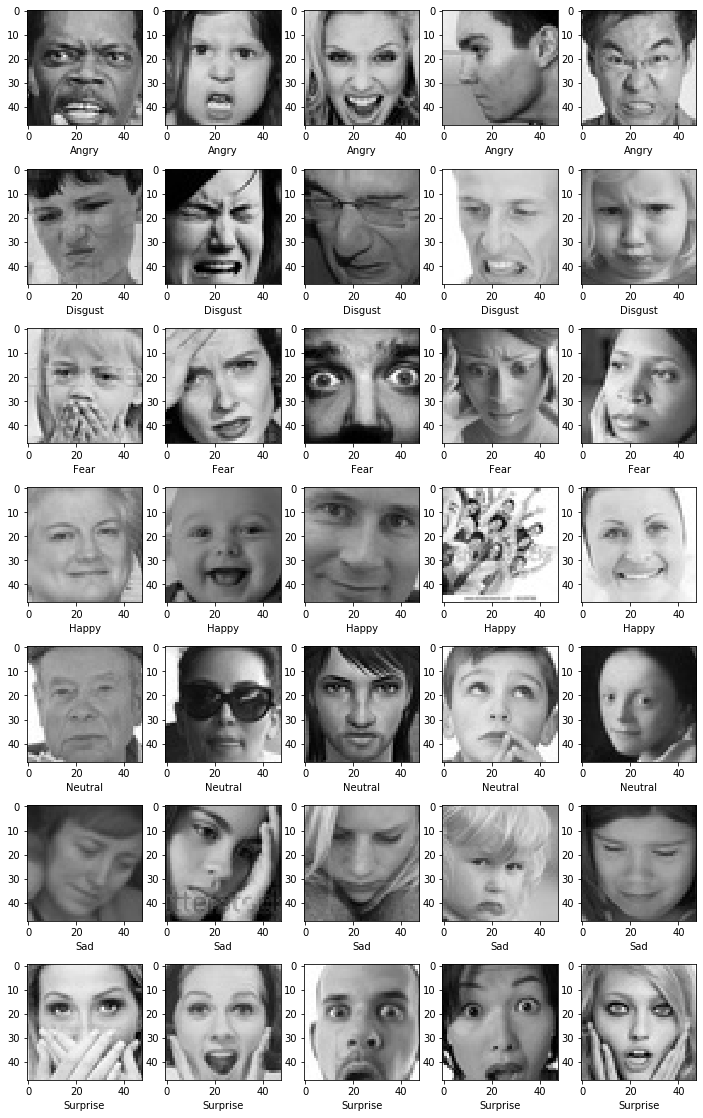

In [7]:
plt.figure(0, figsize=(12, 20))
cpt = 0
for ex in os.listdir(base_path + 'train/'):
    for i in range(0,5):
        cpt = cpt + 1
        ax = plt.subplot(7, 5, cpt)
        img = load_img(base_path+'train/'+ex+'/'+os.listdir(base_path + "train/" + ex)[i], target_size=(img_size, img_size))
        ax.set_xlabel(ex)
        plt.imshow(img)

In [8]:
print("Validation Dataset")
for ex in os.listdir(base_path + 'val/'):
    print(str(len(os.listdir(base_path+'val/'+ex)))+ "  " + ex + ' Images')  

Validation Dataset
991  Angry Images
110  Disgust Images
1025  Fear Images
1798  Happy Images
1240  Neutral Images
1216  Sad Images
801  Surprise Images


In [10]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range = 45,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                                  horizontal_flip=True)

In [11]:
train_set = train_data_gen.flow_from_directory(directory = 'dataset/train',
                                              target_size = (img_size, img_size),
                                              shuffle =True,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                               color_mode='grayscale')

Found 28706 images belonging to 7 classes.


In [12]:
val_data_gen = ImageDataGenerator(rescale = 1./255)

In [13]:
val_set = val_data_gen.flow_from_directory(directory = 'dataset/val',
                                          shuffle = False,
                                          target_size = (img_size, img_size),
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                           color_mode='grayscale')

Found 7181 images belonging to 7 classes.


In [14]:
cnn = Sequential()

# layer 1 
cnn.add(Conv2D(64, (3,3), padding='same', input_shape=(img_size, img_size, 1)))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))


#layer 2
cnn.add(Conv2D(128,(3,3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

#layer 3
cnn.add(Conv2D(256,(3,3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

#layer 4
cnn.add(Conv2D(512,(3,3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))


#flatting
cnn.add(Flatten())

cnn.add(Dense(units=256))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))

cnn.add(Dense(units=512))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))

cnn.add(Dense(units=7))
cnn.add(Activation('softmax'))

In [15]:
sgd = SGD(lr=0.005, momentum=0.9)
adm = optimizers.Adam(learning_rate=0.005)

In [16]:
cnn.compile(optimizer=adm,
           loss='categorical_crossentropy',
           metrics=['accuracy']
           )

In [17]:
# save best weights
checkpoint = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

# num epochs
callbacks_list = [checkpoint]

In [18]:
history = cnn.fit_generator(train_set, 
                       steps_per_epoch = int(np.ceil(train_set.n/train_set.batch_size)),
                        epochs=epochs,
                        validation_data = val_set,
                        validation_steps = int(np.ceil(val_set.n/val_set.batch_size)),
                        callbacks=callbacks_list, verbose=2)


Epoch 1/30
 - 1102s - loss: 1.8989 - accuracy: 0.2288 - val_loss: 1.3533 - val_accuracy: 0.2321

Epoch 00001: val_loss improved from inf to 1.35331, saving model to face_model.h5
Epoch 2/30
 - 1546s - loss: 1.7434 - accuracy: 0.2860 - val_loss: 3.3177 - val_accuracy: 0.2713

Epoch 00002: val_loss did not improve from 1.35331
Epoch 3/30
 - 1573s - loss: 1.6458 - accuracy: 0.3432 - val_loss: 1.9285 - val_accuracy: 0.3403

Epoch 00003: val_loss did not improve from 1.35331
Epoch 4/30
 - 1661s - loss: 1.5461 - accuracy: 0.3944 - val_loss: 1.8159 - val_accuracy: 0.3948

Epoch 00004: val_loss did not improve from 1.35331
Epoch 5/30
 - 1190s - loss: 1.4713 - accuracy: 0.4286 - val_loss: 0.6973 - val_accuracy: 0.3729

Epoch 00005: val_loss improved from 1.35331 to 0.69728, saving model to face_model.h5
Epoch 6/30
 - 1554s - loss: 1.4195 - accuracy: 0.4551 - val_loss: 1.3913 - val_accuracy: 0.5175

Epoch 00006: val_loss did not improve from 0.69728
Epoch 7/30
 - 1225s - loss: 1.3779 - accuracy

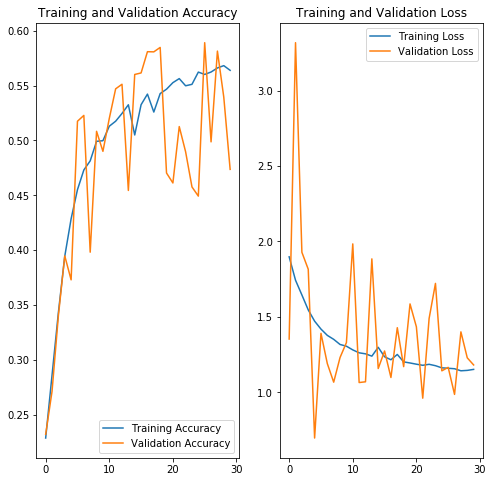

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# Save model structure to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Lets make the Accuracy matrix for our model.

<Figure size 432x288 with 0 Axes>

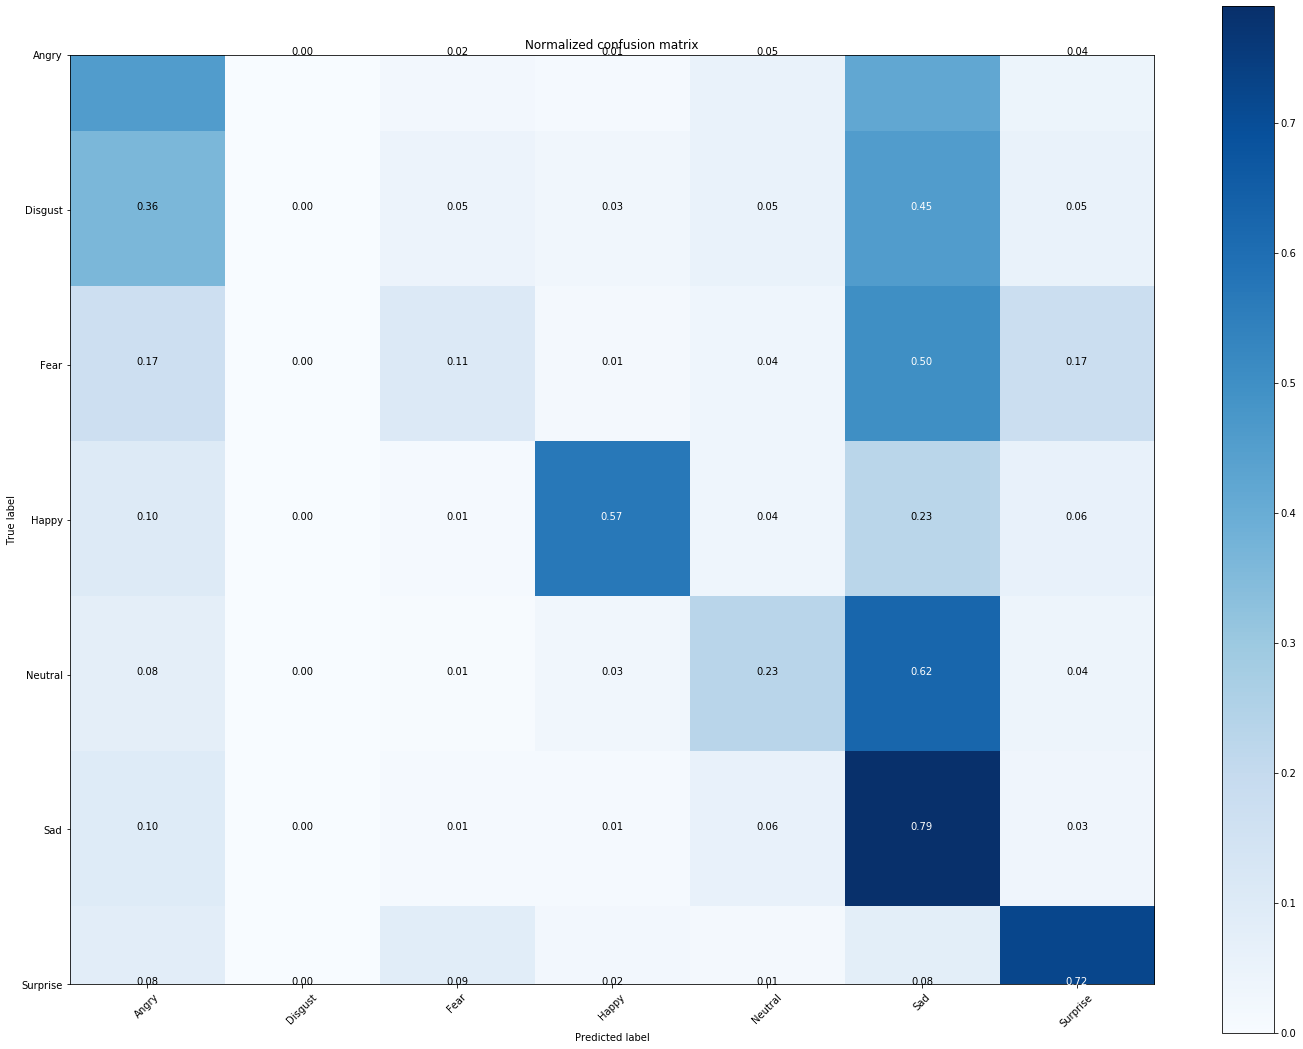

In [23]:
# show the confusion matrix of our predictions

# compute predictions
predictions = cnn.predict_generator(generator=val_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_set.classes
class_names = val_set.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(20,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

The accuracy for our model is nearly 65% which is not good at all. But Idea here was to explore how the face detection images works. We have explored the how the model works and how we detect the human faces and process infromation out of them. 
We can further try with larger dataset and more further combination of model layers to achive to improve model performance and achive high accuracy. 